In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import json
import re

# FotMob

In [3]:
url = 'https://www.fotmob.com/matches/marseille-vs-brighton/2x6hvy#4315104'
page = requests.get(url)

In [4]:
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.text,'html.parser')

In [6]:
scripts = soup.find_all('script')

In [7]:
scripts

[<script type="application/ld+json">{"@context":"https://schema.org","@type":"FAQPage","mainEntity":[{"@type":"Question","name":"Who won between Brighton & Hove Albion and Marseille on Thu, 14 Dec 2023 20:00:00 GMT?","acceptedAnswer":{"@type":"Answer","text":"Brighton & Hove Albion won 1–0 over Marseille on Thu, 14 Dec 2023 20:00:00 GMT."}}]}</script>,
 <script type="application/ld+json">{"@context":"https://schema.org","@type":"SportsEvent","sport":"Football/Soccer","homeTeam":{"@context":"https://schema.org","@type":"SportsTeam","name":"Brighton & Hove Albion","sport":"Football/Soccer","logo":"https://images.fotmob.com/image_resources/logo/teamlogo/10204.png","url":"https://www.fotmob.com/teams/10204/overview/brighton-hove-albion","location":null,"memberOf":null},"awayTeam":{"@context":"https://schema.org","@type":"SportsTeam","name":"Marseille","sport":"Football/Soccer","logo":"https://images.fotmob.com/image_resources/logo/teamlogo/8592.png","url":"https://www.fotmob.com/teams/8592

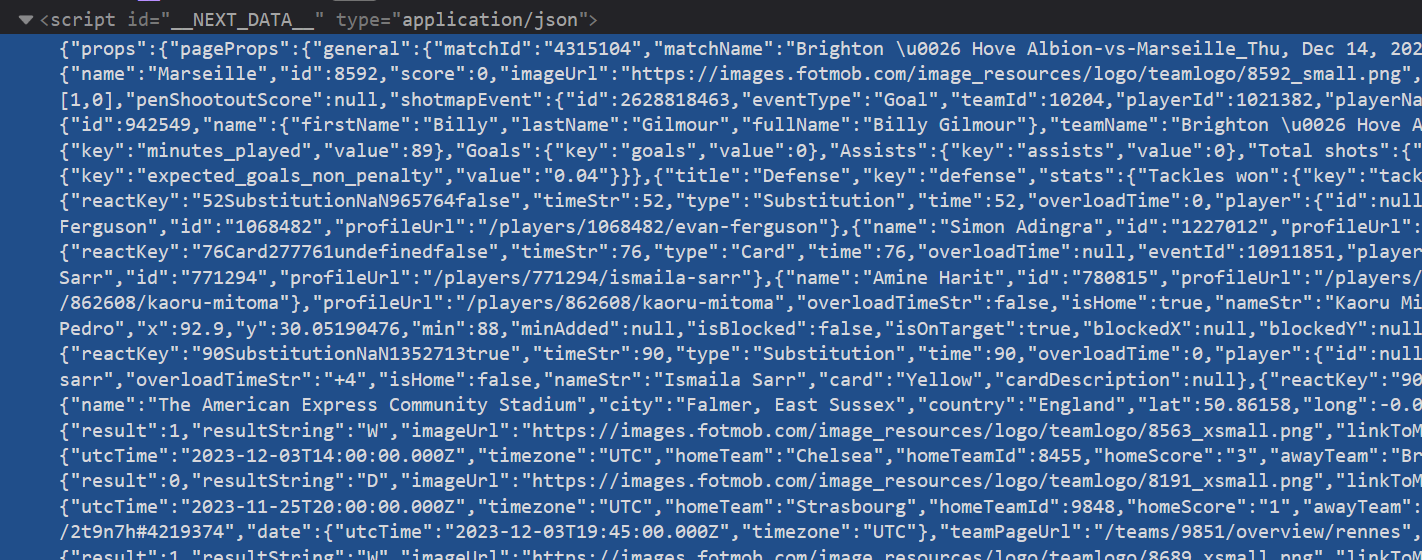

In [8]:
#this is the the specific string from the "scripts" HMTL that contains the JSON data
#scripts[103]

In [9]:
strings = scripts[103].string
#strings

In [10]:
#splitting to only select the relevant match data ("strings" includes more stuff we don't want...)
before, sep, after = strings.partition(',"seo"')

In [11]:
#before

In [12]:
def check_json_brackets(json_string):
    square_brackets = 0  # For []
    curly_brackets = 0   # For {}

    for char in json_string:
        if char == '[':
            square_brackets += 1
        elif char == ']':
            square_brackets -= 1
        elif char == '{':
            curly_brackets += 1
        elif char == '}':
            curly_brackets -= 1

    return square_brackets, curly_brackets

# Replace with your actual JSON string
json_string = before
square, curly = check_json_brackets(json_string)

print("Mismatch in square brackets: ", square)
print("Mismatch in curly brackets: ", curly)

Mismatch in square brackets:  0
Mismatch in curly brackets:  3


In [13]:
#correcting the JSON string in order to be able to parse it
before = before.replace(r'{"props":{"pageProps":','')
before = before + '}'

In [14]:
data = json.loads(before)

In [15]:
df = pd.json_normalize(data)

In [16]:
df

nav  ongoing  hasPendingVAR  \
0  [matchfacts, liveticker, lineup, stats, table,...    False          False   

  general.matchId                                  general.matchName  \
0         4315104  Brighton & Hove Albion-vs-Marseille_Thu, Dec 1...   

  general.matchRound general.teamColors.darkMode.home  \
0                  6                          #095bb6   

  general.teamColors.darkMode.away general.teamColors.lightMode.home  \
0                          #ffffff                           #0850A0   

  general.teamColors.lightMode.away  ...  \
0                           #242736  ...   

                                  content.table.url content.table.teams  \
0  https://data.fotmob.com/tables.ext.887389.fot.gz       [10204, 8592]   

  content.table.tournamentNameForUrl content.table.parentLeagueId  \
0               Europa League Grp. B                           73   

   content.table.countryCode content.h2h.summary  \
0                      INT-2           [0, 1, 0]   

                                 content.h2h.matches  \
0  [{'time': {'utcTime': '2023-10-05T16:45:00.000...   

                          content.momentum.main.data  \
0  [{'minute': 0, 'value': 0}, {'minute': 1, 'val...   

  content.momentum.main.debugTitle content.momentum.alternateModels  
0              Using xT SA-version                               []  

[1 rows x 196 columns]

In [17]:
data.keys()

dict_keys(['general', 'header', 'nav', 'ongoing', 'hasPendingVAR', 'content'])

In [18]:
data.values()

dict_values([{'matchId': '4315104', 'matchName': 'Brighton & Hove Albion-vs-Marseille_Thu, Dec 14, 2023, 20:00 UTC', 'matchRound': '6', 'teamColors': {'darkMode': {'home': '#095bb6', 'away': '#ffffff'}, 'lightMode': {'home': '#0850A0', 'away': '#242736'}, 'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)', 'away': 'rgba(29, 29, 29, 1.0)'}, 'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)', 'away': 'rgba(255, 255, 255, 1.0)'}}, 'leagueId': 887389, 'leagueName': 'Europa League Grp. B', 'leagueRoundName': 'Round 6', 'parentLeagueId': 73, 'countryCode': 'INT-2', 'homeTeam': {'name': 'Brighton & Hove Albion', 'id': 10204}, 'awayTeam': {'name': 'Marseille', 'id': 8592}, 'coverageLevel': 'xG', 'matchTimeUTC': 'Thu, Dec 14, 2023, 20:00 UTC', 'matchTimeUTCDate': '2023-12-14T20:00:00.000Z', 'started': True, 'finished': True}, {'teams': [{'name': 'Brighton & Hove Albion', 'id': 10204, 'score': 1, 'imageUrl': 'https://images.fotmob.com/image_resources/logo/teamlogo/10204_small.png', 'pageUrl':

In [19]:
data

{'general': {'matchId': '4315104',
  'matchName': 'Brighton & Hove Albion-vs-Marseille_Thu, Dec 14, 2023, 20:00 UTC',
  'matchRound': '6',
  'teamColors': {'darkMode': {'home': '#095bb6', 'away': '#ffffff'},
   'lightMode': {'home': '#0850A0', 'away': '#242736'},
   'fontDarkMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(29, 29, 29, 1.0)'},
   'fontLightMode': {'home': 'rgba(255, 255, 255, 1.0)',
    'away': 'rgba(255, 255, 255, 1.0)'}},
  'leagueId': 887389,
  'leagueName': 'Europa League Grp. B',
  'leagueRoundName': 'Round 6',
  'parentLeagueId': 73,
  'countryCode': 'INT-2',
  'homeTeam': {'name': 'Brighton & Hove Albion', 'id': 10204},
  'awayTeam': {'name': 'Marseille', 'id': 8592},
  'coverageLevel': 'xG',
  'matchTimeUTC': 'Thu, Dec 14, 2023, 20:00 UTC',
  'matchTimeUTCDate': '2023-12-14T20:00:00.000Z',
  'started': True,
  'finished': True},
 'header': {'teams': [{'name': 'Brighton & Hove Albion',
    'id': 10204,
    'score': 1,
    'imageUrl': 'https://images.

**Lineups**
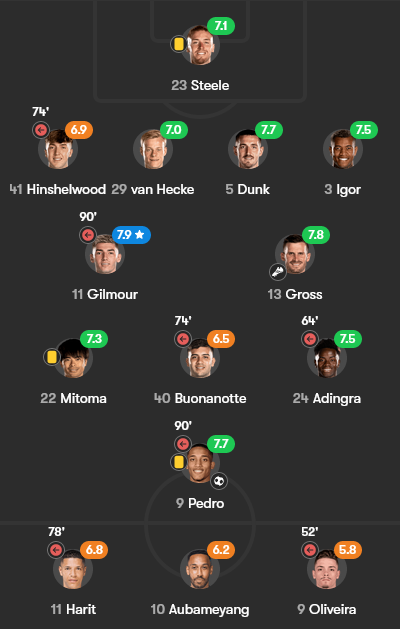

In [20]:
data['content']['lineup']

{'lineup': [{'teamId': 10204,
   'teamName': 'Brighton & Hove Albion',
   'bench': [{'id': '1068482',
     'positionId': 0,
     'position': 'Substitute',
     'localizedPosition': None,
     'name': {'firstName': 'Evan',
      'lastName': 'Ferguson',
      'fullName': 'Evan Ferguson'},
     'shirt': 28,
     'usualPosition': 3,
     'usingOptaId': False,
     'teamId': '10204',
     'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
     'pageUrl': '/players/1068482/evan-ferguson',
     'isHomeTeam': True,
     'timeSubbedOn': 64,
     'timeSubbedOff': None,
     'positionRow': 0,
     'role': 'Attacker',
     'events': {'sub': {'subbedIn': 64}},
     'rating': {'num': '6.1',
      'bgcolor': '#f08022',
      'isTop': {'isTopRating': False, 'isMatchFinished': True}},
     'fantasyScore': {'num': None, 'bgcolor': 'purple'},
     'minutesPlayed': 26,
     'shotmap': [{'id': 2628817501,
       'eventType': 'Miss',
       'teamId': 10204,
       'playerId': 

In [21]:
data['content']['lineup']['lineup'][0]

{'teamId': 10204,
 'teamName': 'Brighton & Hove Albion',
 'bench': [{'id': '1068482',
   'positionId': 0,
   'position': 'Substitute',
   'localizedPosition': None,
   'name': {'firstName': 'Evan',
    'lastName': 'Ferguson',
    'fullName': 'Evan Ferguson'},
   'shirt': 28,
   'usualPosition': 3,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
   'pageUrl': '/players/1068482/evan-ferguson',
   'isHomeTeam': True,
   'timeSubbedOn': 64,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Attacker',
   'events': {'sub': {'subbedIn': 64}},
   'rating': {'num': '6.1',
    'bgcolor': '#f08022',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 26,
   'shotmap': [{'id': 2628817501,
     'eventType': 'Miss',
     'teamId': 10204,
     'playerId': 1068482,
     'playerName': 'Evan Ferguson',
     'x': 86.5676470584,


In [22]:
data['content']['lineup']['lineup'][1]

{'teamId': 8592,
 'teamName': 'Marseille',
 'bench': [{'id': '965764',
   'positionId': 0,
   'position': 'Substitute',
   'localizedPosition': None,
   'name': {'firstName': 'Iliman',
    'lastName': 'Ndiaye',
    'fullName': 'Iliman Ndiaye'},
   'shirt': 29,
   'usualPosition': 3,
   'usingOptaId': False,
   'teamId': '8592',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/965764.png',
   'pageUrl': '/players/965764/iliman-ndiaye',
   'isHomeTeam': False,
   'timeSubbedOn': 52,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Attacker',
   'events': {'sub': {'subbedIn': 52}},
   'rating': {'num': '6.6',
    'bgcolor': '#f08022',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 38,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 6.55},
      'Minutes played': {'key': 'mi

In [23]:
data['content']['lineup']['lineup'][0]['players']

[[{'id': '107917',
   'positionId': 11,
   'position': 'Keeper',
   'positionStringShort': 'GK',
   'localizedPosition': {'label': 'GK', 'key': 'keeper'},
   'name': {'firstName': 'Jason',
    'lastName': 'Steele',
    'fullName': 'Jason Steele'},
   'shirt': 23,
   'usualPosition': 0,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
   'pageUrl': '/players/107917/jason-steele',
   'isHomeTeam': True,
   'timeSubbedOn': None,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Keeper',
   'events': {'yc': 1},
   'rating': {'num': '7.1',
    'bgcolor': '#1ec853',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 90,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
      'Minutes played': {'key': 'minutes_played',

In [24]:
data['content']['lineup']['lineup'][0]['lineup']

'4 - 2 - 3 - 1'

In [25]:
data['content']['lineup']['lineup'][0]['optaLineup']['bench']

[{'id': '1068482',
  'positionId': 0,
  'position': 'Substitute',
  'localizedPosition': None,
  'name': {'firstName': 'Evan',
   'lastName': 'Ferguson',
   'fullName': 'Evan Ferguson'},
  'shirt': 28,
  'usualPosition': 3,
  'usingOptaId': False,
  'teamId': '10204',
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/1068482.png',
  'pageUrl': '/players/1068482/evan-ferguson',
  'isHomeTeam': False,
  'timeSubbedOn': 64,
  'timeSubbedOff': None,
  'positionRow': 0,
  'role': 'Attacker',
  'events': {'sub': {'subbedIn': 64}},
  'rating': {'num': '6.1',
   'bgcolor': '#f08022',
   'isTop': {'isTopRating': False, 'isMatchFinished': True}},
  'fantasyScore': {'num': None, 'bgcolor': 'purple'},
  'minutesPlayed': 26,
  'shotmap': [{'id': 2628817501,
    'eventType': 'Miss',
    'teamId': 10204,
    'playerId': 1068482,
    'playerName': 'Evan Ferguson',
    'x': 86.5676470584,
    'y': 24.5597452279,
    'min': 86,
    'minAdded': None,
    'isBlocked': False,
    'isOnT

In [26]:
data['content']['lineup']['lineup'][0]['optaLineup']['coach']

[{'id': '42044',
  'name': {'firstName': 'Roberto',
   'lastName': 'De Zerbi',
   'fullName': 'Roberto De Zerbi'},
  'usualPosition': 5,
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/42044.png',
  'pageUrl': '/players/42044/roberto-de-zerbi',
  'isHomeTeam': False,
  'timeSubbedOn': None,
  'timeSubbedOff': None,
  'positionRow': None,
  'role': 'Coach',
  'isCaptain': False,
  'events': {}}]

In [27]:
data['content']['lineup']['lineup'][0]['optaLineup']['players']

[[{'id': '107917',
   'positionId': 11,
   'position': 'Keeper',
   'positionStringShort': 'GK',
   'localizedPosition': {'label': 'GK', 'key': 'keeper'},
   'name': {'firstName': 'Jason',
    'lastName': 'Steele',
    'fullName': 'Jason Steele'},
   'shirt': 23,
   'usualPosition': 0,
   'usingOptaId': False,
   'teamId': '10204',
   'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
   'pageUrl': '/players/107917/jason-steele',
   'isHomeTeam': False,
   'timeSubbedOn': None,
   'timeSubbedOff': None,
   'positionRow': 0,
   'role': 'Keeper',
   'events': {'yc': 1},
   'rating': {'num': '7.1',
    'bgcolor': '#1ec853',
    'isTop': {'isTopRating': False, 'isMatchFinished': True}},
   'fantasyScore': {'num': None, 'bgcolor': 'purple'},
   'minutesPlayed': 90,
   'shotmap': [],
   'stats': [{'title': 'Top stats',
     'key': 'top_stats',
     'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
      'Minutes played': {'key': 'minutes_played'

**Player profiles**
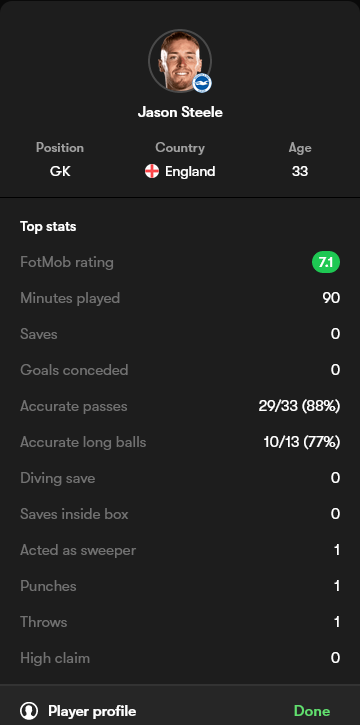

In [28]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][0]

[{'id': '107917',
  'positionId': 11,
  'position': 'Keeper',
  'positionStringShort': 'GK',
  'localizedPosition': {'label': 'GK', 'key': 'keeper'},
  'name': {'firstName': 'Jason',
   'lastName': 'Steele',
   'fullName': 'Jason Steele'},
  'shirt': 23,
  'usualPosition': 0,
  'usingOptaId': False,
  'teamId': '10204',
  'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/107917.png',
  'pageUrl': '/players/107917/jason-steele',
  'isHomeTeam': False,
  'timeSubbedOn': None,
  'timeSubbedOff': None,
  'positionRow': 0,
  'role': 'Keeper',
  'events': {'yc': 1},
  'rating': {'num': '7.1',
   'bgcolor': '#1ec853',
   'isTop': {'isTopRating': False, 'isMatchFinished': True}},
  'fantasyScore': {'num': None, 'bgcolor': 'purple'},
  'minutesPlayed': 90,
  'shotmap': [],
  'stats': [{'title': 'Top stats',
    'key': 'top_stats',
    'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.09},
     'Minutes played': {'key': 'minutes_played', 'value': 90},
     'Saves': 

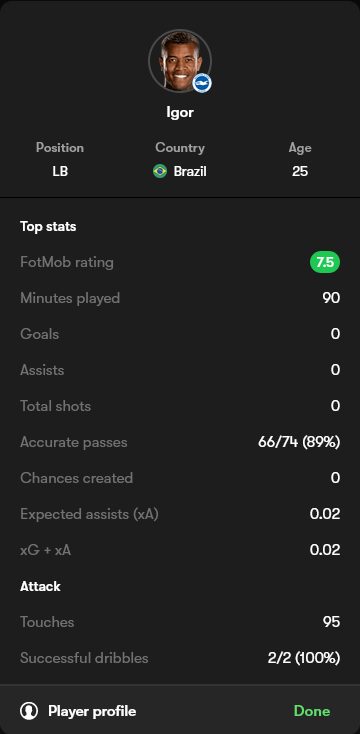

In [29]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][1][3]

{'id': '768331',
 'positionId': 38,
 'position': 'Defender',
 'positionStringShort': 'LB',
 'localizedPosition': {'label': 'LB', 'key': 'leftback_short'},
 'name': {'firstName': '', 'lastName': 'Igor', 'fullName': 'Igor'},
 'shirt': 3,
 'usualPosition': 1,
 'usingOptaId': False,
 'teamId': '10204',
 'imageUrl': 'https://images.fotmob.com/image_resources/playerimages/768331.png',
 'pageUrl': '/players/768331/igor',
 'isHomeTeam': False,
 'timeSubbedOn': None,
 'timeSubbedOff': None,
 'positionRow': 1,
 'role': 'Defender',
 'events': {},
 'rating': {'num': '7.5',
  'bgcolor': '#1ec853',
  'isTop': {'isTopRating': False, 'isMatchFinished': True}},
 'fantasyScore': {'num': None, 'bgcolor': 'purple'},
 'minutesPlayed': 90,
 'shotmap': [],
 'stats': [{'title': 'Top stats',
   'key': 'top_stats',
   'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.46},
    'Minutes played': {'key': 'minutes_played', 'value': 90},
    'Goals': {'key': 'goals', 'value': 0},
    'Assists': {'key': '

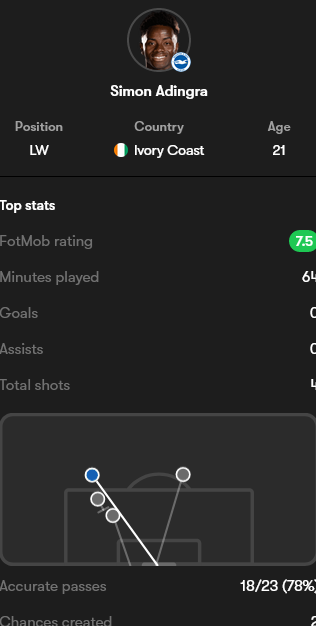

In [30]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['shotmap']

[{'id': 2628760769,
  'eventType': 'AttemptSaved',
  'teamId': 10204,
  'playerId': 1227012,
  'playerName': 'Simon Adingra',
  'x': 85.70882352880001,
  'y': 19.7954140155,
  'min': 7,
  'minAdded': None,
  'isBlocked': False,
  'isOnTarget': True,
  'blockedX': 102.53448275880001,
  'blockedY': 32.3225,
  'goalCrossedY': 33.77125,
  'goalCrossedZ': 0.28252631440000003,
  'expectedGoals': 0.0248645581305027,
  'expectedGoalsOnTarget': 0.0225,
  'shotType': 'LeftFoot',
  'situation': 'RegularPlay',
  'period': 'FirstHalf',
  'isOwnGoal': False,
  'onGoalShot': {'x': 1.0605158730158726,
   'y': 0.07474241121693122,
   'zoomRatio': 1},
  'isSavedOffLine': False,
  'teamColor': '#0850A0'},
 {'id': 2628771325,
  'eventType': 'AttemptSaved',
  'teamId': 10204,
  'playerId': 1227012,
  'playerName': 'Simon Adingra',
  'x': 90.8,
  'y': 20.9864968186,
  'min': 23,
  'minAdded': None,
  'isBlocked': True,
  'isOnTarget': True,
  'blockedX': 93.1,
  'blockedY': 22.177579621699998,
  'goalCrosse

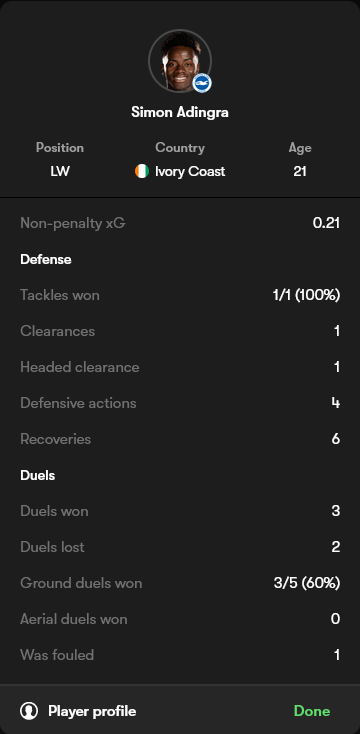

In [31]:
data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats']

[{'title': 'Top stats',
  'key': 'top_stats',
  'stats': {'FotMob rating': {'key': 'rating_title', 'value': 7.47},
   'Minutes played': {'key': 'minutes_played', 'value': 64},
   'Goals': {'key': 'goals', 'value': 0},
   'Assists': {'key': 'assists', 'value': 0},
   'Total shots': {'key': 'total_shots', 'value': 4},
   'Shotmap': {'key': None, 'value': True},
   'Accurate passes': {'key': 'accurate_passes', 'value': '18/23 (78%)'},
   'Chances created': {'key': 'chances_created', 'value': 2},
   'Expected goals (xG)': {'key': 'expected_goals', 'value': '0.21'},
   'Expected goals on target (xGOT)': {'key': 'expected_goals_on_target_variant',
    'value': '0.02'},
   'Expected assists (xA)': {'key': 'expected_assists', 'value': '0.17'},
   'xG + xA': {'key': 'xg_and_xa', 'value': '0.38'}}},
 {'title': 'Attack',
  'key': 'attack',
  'stats': {'Shot accuracy': {'key': 'shot_accuracy', 'value': '1/3 (33%)'},
   'Blocked shots': {'key': 'blocked_shots', 'value': 1},
   'Touches': {'key': 't

In [32]:
adingra_top_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][0]
adingra_top_df = pd.json_normalize(adingra_top_stats)
adingra_top_df

title        key stats.FotMob rating.key  stats.FotMob rating.value  \
0  Top stats  top_stats            rating_title                       7.47   

  stats.Minutes played.key  stats.Minutes played.value stats.Goals.key  \
0           minutes_played                          64           goals   

   stats.Goals.value stats.Assists.key  stats.Assists.value  ...  \
0                  0           assists                    0  ...   

  stats.Chances created.key  stats.Chances created.value  \
0           chances_created                            2   

  stats.Expected goals (xG).key  stats.Expected goals (xG).value  \
0                expected_goals                             0.21   

  stats.Expected goals on target (xGOT).key  \
0          expected_goals_on_target_variant   

  stats.Expected goals on target (xGOT).value stats.Expected assists (xA).key  \
0                                        0.02                expected_assists   

   stats.Expected assists (xA).value stats.xG + xA.key stats.xG + xA.value  
0                               0.17         xg_and_xa                0.38  

[1 rows x 26 columns]

In [33]:
adingra_attack_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][1]
adingra_attack = pd.json_normalize(adingra_attack_stats)
adingra_attack

title     key stats.Shot accuracy.key stats.Shot accuracy.value  \
0  Attack  attack           shot_accuracy                 1/3 (33%)   

  stats.Blocked shots.key  stats.Blocked shots.value stats.Touches.key  \
0           blocked_shots                          1           touches   

   stats.Touches.value stats.Touches in opposition box.key  \
0                   37                     touches_opp_box   

   stats.Touches in opposition box.value  ...  \
0                                      7  ...   

  stats.Passes into final third.key stats.Passes into final third.value  \
0           passes_into_final_third                                   2   

  stats.Accurate crosses.key  stats.Accurate crosses.value  \
0           accurate_crosses                      0/1 (0%)   

  stats.Accurate long balls.key stats.Accurate long balls.value  \
0           long_balls_accurate                       1/2 (50%)   

  stats.Dispossessed.key stats.Dispossessed.value    stats.xG Non-penalty.key  \
0           dispossessed                        0  expected_goals_non_penalty   

   stats.xG Non-penalty.value  
0                        0.21  

[1 rows x 22 columns]

In [34]:
adingra_defense_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][2]
adingra_defense = pd.json_normalize(adingra_defense_stats)
adingra_defense

title      key stats.Tackles won.key stats.Tackles won.value  \
0  Defense  defense     tackles_succeeded              1/1 (100%)   

  stats.Clearances.key  stats.Clearances.value stats.Headed clearance.key  \
0           clearances                       1           headed_clearance   

   stats.Headed clearance.value stats.Defensive actions.key  \
0                             1           defensive_actions   

   stats.Defensive actions.value stats.Recoveries.key  stats.Recoveries.value  
0                              4           recoveries                       6

In [35]:
adingra_duel_stats = data['content']['lineup']['lineup'][0]['optaLineup']['players'][3][0]['stats'][3]
adingra_duels = pd.json_normalize(adingra_duel_stats)
adingra_duels

title    key stats.Duels won.key  stats.Duels won.value  \
0  Duels  duels            duel_won                      3   

  stats.Duels lost.key  stats.Duels lost.value stats.Ground duels won.key  \
0            duel_lost                       2           ground_duels_won   

  stats.Ground duels won.value stats.Aerial duels won.key  \
0                    3/5 (60%)                aerials_won   

   stats.Aerial duels won.value stats.Was fouled.key  stats.Was fouled.value  \
0                             0           was_fouled                       1   

  stats.Fouls committed.key  stats.Fouls committed.value  
0                     fouls                            2

**Compared/Team Stats**

In [36]:
json_stats = data['content']['stats']['Periods']['All']['stats']
json_stats

[{'title': 'Top stats',
  'key': 'top_stats',
  'stats': [{'title': 'Ball possession',
    'key': 'BallPossesion',
    'stats': [61, 39],
    'type': 'graph',
    'highlighted': 'home'},
   {'title': 'Expected goals (xG)',
    'key': 'expected_goals',
    'stats': ['1.16', '0.38'],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Total shots',
    'key': 'total_shots',
    'stats': [13, 5],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Shots on target',
    'key': 'ShotsOnTarget',
    'stats': [5, 0],
    'type': 'text',
    'highlighted': 'home'},
   {'title': 'Big chances',
    'key': 'big_chance',
    'stats': [0, 0],
    'type': 'text',
    'highlighted': 'equal'},
   {'title': 'Big chances missed',
    'key': 'big_chance_missed_title',
    'stats': [0, 0],
    'type': 'text',
    'highlighted': 'equal'},
   {'title': 'Accurate passes',
    'key': 'accurate_passes',
    'stats': ['547 (89%)', '314 (82%)'],
    'type': 'text',
    'highlighted': 'home'},

In [37]:
game_stats = pd.json_normalize(json_stats)
game_stats

title             key  \
0            Top stats       top_stats   
1                Shots           shots   
2  Expected goals (xG)  expected_goals   
3               Passes          passes   
4              Defence         defence   
5                Duels           duels   
6           Discipline      discipline   

                                               stats  
0  [{'title': 'Ball possession', 'key': 'BallPoss...  
1  [{'title': 'Shots', 'key': 'shots', 'stats': [...  
2  [{'title': 'Expected goals (xG)', 'key': 'expe...  
3  [{'title': 'Passes', 'key': 'passes', 'stats':...  
4  [{'title': 'Defence', 'key': 'defense', 'stats...  
5  [{'title': 'Duels', 'key': 'duels', 'stats': [...  
6  [{'title': 'Discipline', 'key': 'discipline', ...

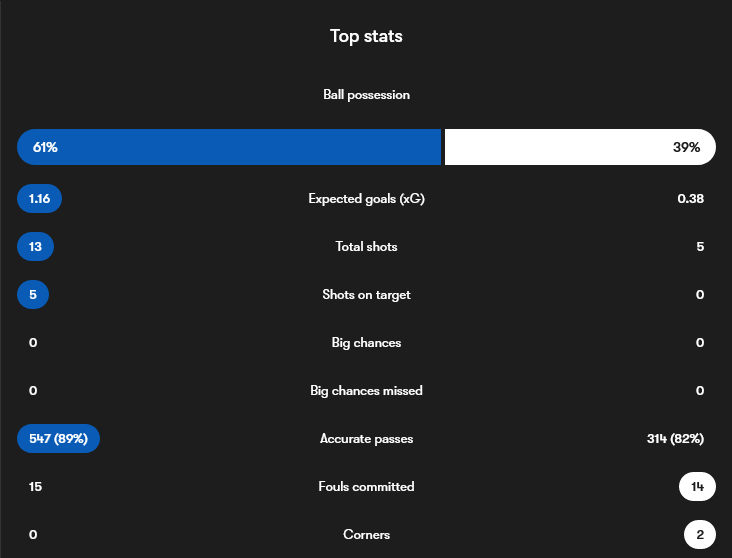

In [38]:
top_stats = data['content']['stats']['Periods']['All']['stats'][0]['stats']
top_stats

[{'title': 'Ball possession',
  'key': 'BallPossesion',
  'stats': [61, 39],
  'type': 'graph',
  'highlighted': 'home'},
 {'title': 'Expected goals (xG)',
  'key': 'expected_goals',
  'stats': ['1.16', '0.38'],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Total shots',
  'key': 'total_shots',
  'stats': [13, 5],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Shots on target',
  'key': 'ShotsOnTarget',
  'stats': [5, 0],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Big chances',
  'key': 'big_chance',
  'stats': [0, 0],
  'type': 'text',
  'highlighted': 'equal'},
 {'title': 'Big chances missed',
  'key': 'big_chance_missed_title',
  'stats': [0, 0],
  'type': 'text',
  'highlighted': 'equal'},
 {'title': 'Accurate passes',
  'key': 'accurate_passes',
  'stats': ['547 (89%)', '314 (82%)'],
  'type': 'text',
  'highlighted': 'home'},
 {'title': 'Fouls committed',
  'key': 'fouls',
  'stats': [15, 14],
  'type': 'text',
  'highlighted': 'away'},
 {'title': 

In [39]:
top_stats = pd.json_normalize(top_stats)
top_stats

title                      key                   stats  \
0      Ball possession            BallPossesion                [61, 39]   
1  Expected goals (xG)           expected_goals            [1.16, 0.38]   
2          Total shots              total_shots                 [13, 5]   
3      Shots on target            ShotsOnTarget                  [5, 0]   
4          Big chances               big_chance                  [0, 0]   
5   Big chances missed  big_chance_missed_title                  [0, 0]   
6      Accurate passes          accurate_passes  [547 (89%), 314 (82%)]   
7      Fouls committed                    fouls                [15, 14]   
8              Corners                  corners                  [0, 2]   

    type highlighted  
0  graph        home  
1   text        home  
2   text        home  
3   text        home  
4   text       equal  
5   text       equal  
6   text        home  
7   text        away  
8   text        away

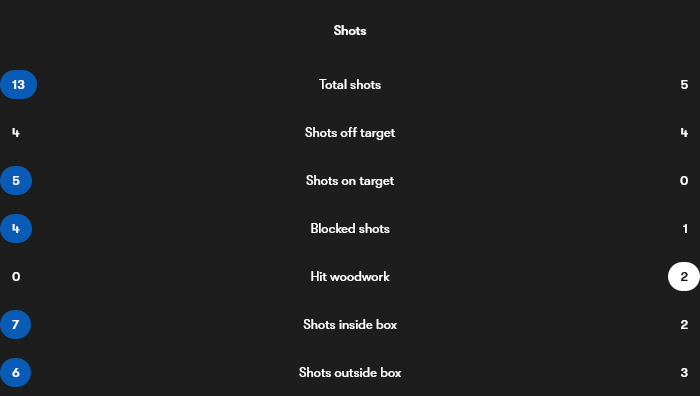

In [40]:
shooting_stats = data['content']['stats']['Periods']['All']['stats'][1]['stats']
shooting_stats = pd.json_normalize(shooting_stats)
shooting_stats

title                key         stats   type highlighted
0              Shots              shots  [None, None]  title       equal
1        Total shots        total_shots       [13, 5]   text        home
2   Shots off target     ShotsOffTarget        [4, 4]   text       equal
3    Shots on target      ShotsOnTarget        [5, 0]   text        home
4      Blocked shots      blocked_shots        [4, 1]   text        home
5       Hit woodwork     shots_woodwork        [0, 2]   text        away
6   Shots inside box   shots_inside_box        [7, 2]   text        home
7  Shots outside box  shots_outside_box        [6, 3]   text        home

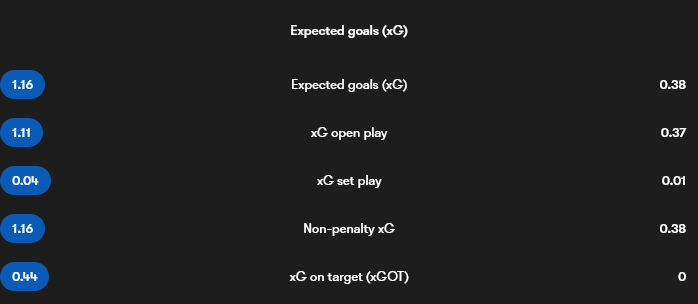

In [41]:
xG_stats = data['content']['stats']['Periods']['All']['stats'][2]['stats']
xG_stats = pd.json_normalize(xG_stats)
xG_stats

title                         key         stats   type  \
0  Expected goals (xG)              expected_goals  [None, None]  title   
1  Expected goals (xG)              expected_goals  [1.16, 0.38]   text   
2         xG open play    expected_goals_open_play  [1.11, 0.37]   text   
3          xG set play     expected_goals_set_play  [0.04, 0.01]   text   
4       xG non-penalty  expected_goals_non_penalty  [1.16, 0.38]   text   
5  xG on target (xGOT)    expected_goals_on_target  [0.44, 0.00]   text   

  highlighted  
0       equal  
1        home  
2        home  
3        home  
4        home  
5        home

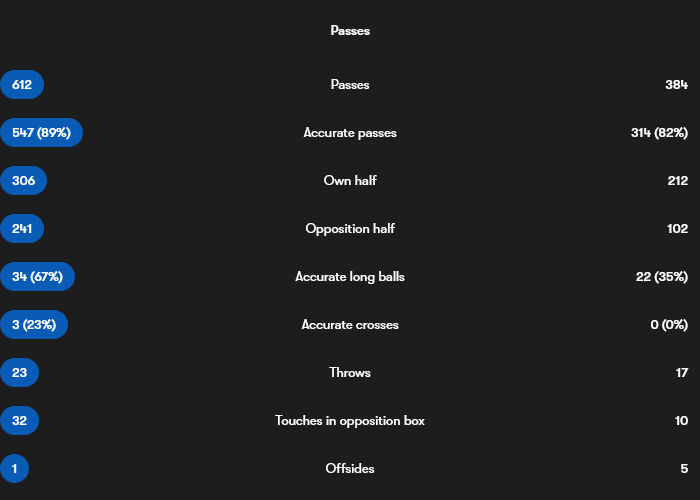

In [42]:
#notice how there's not only passes here but also throws, touches in opp. box and offsides
passing_stats = data['content']['stats']['Periods']['All']['stats'][3]['stats']
passing_stats = pd.json_normalize(passing_stats)
passing_stats

title                     key                   stats  \
0                     Passes                  passes            [None, None]   
1                     Passes                  passes              [612, 384]   
2            Accurate passes         accurate_passes  [547 (89%), 314 (82%)]   
3                   Own half         own_half_passes              [306, 212]   
4            Opposition half  opposition_half_passes              [241, 102]   
5        Accurate long balls     long_balls_accurate    [34 (67%), 22 (35%)]   
6           Accurate crosses        accurate_crosses       [3 (23%), 0 (0%)]   
7                     Throws           player_throws                [23, 17]   
8  Touches in opposition box         touches_opp_box                [32, 10]   
9                   Offsides                Offsides                  [1, 5]   

    type highlighted  
0  title       equal  
1   text        home  
2   text        home  
3   text        home  
4   text        home  
5   text        home  
6   text        home  
7   text        home  
8   text        home  
9   text        home

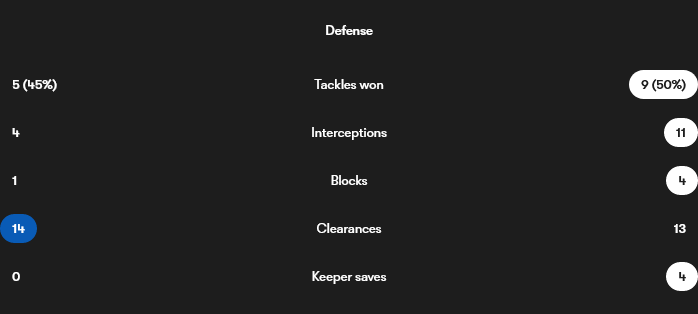

In [43]:
defense_stats = data['content']['stats']['Periods']['All']['stats'][4]['stats']
defense_stats = pd.json_normalize(defense_stats)
defense_stats

title                key               stats   type highlighted
0        Defence            defense        [None, None]  title       equal
1    Tackles won  tackles_succeeded  [5 (45%), 9 (50%)]   text        away
2  Interceptions      interceptions             [4, 11]   text        away
3         Blocks        shot_blocks              [1, 4]   text        away
4     Clearances         clearances            [14, 13]   text        home
5   Keeper saves       keeper_saves              [0, 4]   text        away

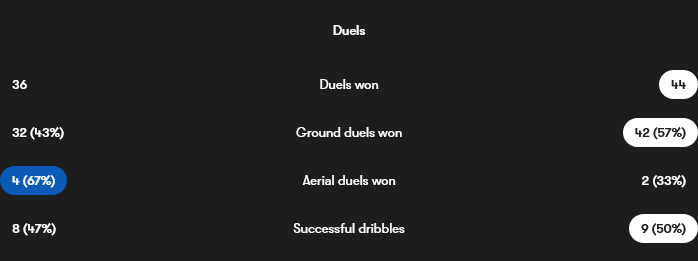

In [44]:
#notice how there's successful dribbles too!
duel_stats = data['content']['stats']['Periods']['All']['stats'][5]['stats']
duel_stats = pd.json_normalize(duel_stats)
duel_stats

title                 key                 stats   type  \
0                Duels               duels          [None, None]  title   
1            Duels won            duel_won              [36, 44]   text   
2     Ground duels won    ground_duels_won  [32 (43%), 42 (57%)]   text   
3     Aerial duels won         aerials_won    [4 (67%), 2 (33%)]   text   
4  Successful dribbles  dribbles_succeeded    [8 (47%), 9 (50%)]   text   

  highlighted  
0       equal  
1        away  
2        away  
3        home  
4        away

**Shotmap and Shot/xG Data**
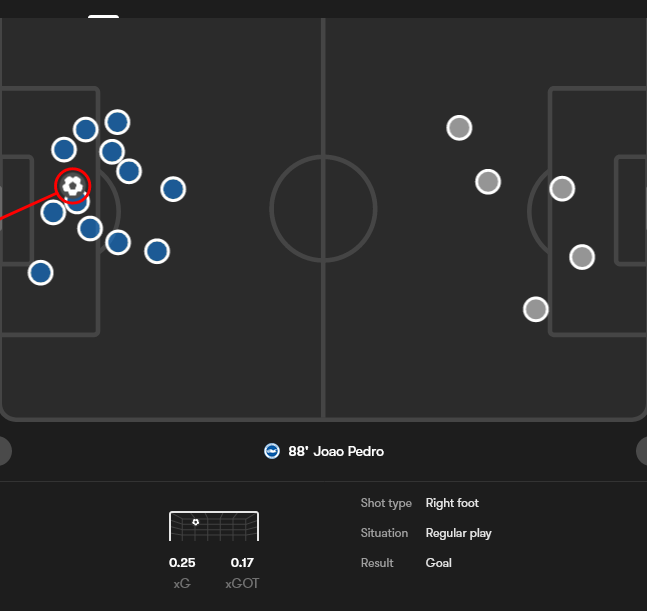

In [45]:
data['content']['shotmap']

{'shots': [{'id': 2628760769,
   'eventType': 'AttemptSaved',
   'teamId': 10204,
   'playerId': 1227012,
   'playerName': 'Simon Adingra',
   'x': 85.70882352880001,
   'y': 19.7954140155,
   'min': 7,
   'minAdded': None,
   'isBlocked': False,
   'isOnTarget': True,
   'blockedX': 102.53448275880001,
   'blockedY': 32.3225,
   'goalCrossedY': 33.77125,
   'goalCrossedZ': 0.28252631440000003,
   'expectedGoals': 0.0248645581305027,
   'expectedGoalsOnTarget': 0.0225,
   'shotType': 'LeftFoot',
   'situation': 'RegularPlay',
   'period': 'FirstHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 1.0605158730158726,
    'y': 0.07474241121693122,
    'zoomRatio': 1},
   'isSavedOffLine': False,
   'firstName': 'Simon',
   'lastName': 'Adingra',
   'fullName': 'Simon Adingra',
   'teamColor': '#0850A0'},
  {'id': 2628763671,
   'eventType': 'Miss',
   'teamId': 10204,
   'playerId': 1021382,
   'playerName': 'Joao Pedro',
   'x': 92.2,
   'y': 32.551249999999996,
   'min': 11,
   'minAdd

In [46]:
json_shots = data['content']['shotmap']['shots']

In [47]:
shots_df = pd.json_normalize(json_shots)

In [48]:
shots_df

id     eventType  teamId  playerId                 playerName  \
0   2628760769  AttemptSaved   10204   1227012              Simon Adingra   
1   2628763671          Miss   10204   1021382                 Joao Pedro   
2   2628766625  AttemptSaved    8592    715301            Jonathan Clauss   
3   2628768007  AttemptSaved   10204    862608               Kaoru Mitoma   
4   2628770157  AttemptSaved   10204   1021382                 Joao Pedro   
5   2628771325  AttemptSaved   10204   1227012              Simon Adingra   
6   2628783789  AttemptSaved   10204   1021382                 Joao Pedro   
7   2628792239  AttemptSaved   10204    942549              Billy Gilmour   
8   2628794269          Miss    8592    150565  Pierre-Emerick Aubameyang   
9   2628798215          Miss   10204   1227012              Simon Adingra   
10  2628798793          Miss   10204   1227012              Simon Adingra   
11  2628799543          Post    8592    780815                Amine Harit   
12  2628802383  AttemptSaved   10204    167008               Pascal Gross   
13  2628806139          Miss    8592    715301            Jonathan Clauss   
14  2628807593          Miss    8592   1073143            Azzedine Ounahi   
15  2628810915  AttemptSaved   10204    201690                 Lewis Dunk   
16  2628817501          Miss   10204   1068482              Evan Ferguson   
17  2628818463          Goal   10204   1021382                 Joao Pedro   

            x          y  min minAdded  isBlocked  ...      period  isOwnGoal  \
0   85.708824  19.795414    7     None      False  ...   FirstHalf      False   
1   92.200000  32.551250   11     None      False  ...   FirstHalf      False   
2   86.567647  18.113885   15     None       True  ...   FirstHalf      False   
3   79.331553  40.553571   18     None      False  ...   FirstHalf      False   
4   96.026316  34.305000   21     None       True  ...   FirstHalf      False   
5   90.800000  20.986497   23     None       True  ...   FirstHalf      False   
6   90.100000  36.897500   41     None      False  ...   FirstHalf      False   
7   83.836408  27.698571   48     None      False  ...  SecondHalf      False   
8   78.881068  38.620476   51     None      False  ...  SecondHalf      False   
9   85.601471  39.124762   57     None      False  ...  SecondHalf      False   
10  94.289474  24.209427   58     None      False  ...  SecondHalf      False   
11  90.800000  37.507500   59     None      False  ...  SecondHalf      False   
12  98.052632  44.000764   63     None       True  ...  SecondHalf      False   
13  94.000000  26.516563   69     None      False  ...  SecondHalf      False   
14  74.263592  47.293758   71     None      False  ...  SecondHalf      False   
15  76.741262  30.568750   76     None       True  ...  SecondHalf      False   
16  86.567647  24.559745   86     None      False  ...  SecondHalf      False   
17  92.900000  30.051905   88     None      False  ...  SecondHalf      False   

    isSavedOffLine       firstName    lastName                   fullName  \
0            False           Simon     Adingra              Simon Adingra   
1            False            Joao       Pedro                 Joao Pedro   
2            False        Jonathan      Clauss            Jonathan Clauss   
3            False           Kaoru      Mitoma               Kaoru Mitoma   
4            False            Joao       Pedro                 Joao Pedro   
5            False           Simon     Adingra              Simon Adingra   
6            False            Joao       Pedro                 Joao Pedro   
7            False           Billy     Gilmour              Billy Gilmour   
8            False  Pierre-Emerick  Aubameyang  Pierre-Emerick Aubameyang   
9            False           Simon     Adingra              Simon Adingra   
10           False           Simon     Adingra              Simon Adingra   
11           False           Amine       Harit                Amine Harit   
12     

In [49]:
shots_df['expectedGoals']

0     0.024865
1     0.097910
2     0.015735
3     0.017694
4     0.244879
5     0.022812
6     0.106621
7     0.038355
8     0.024312
9     0.074018
10    0.088350
11    0.190031
12    0.066655
13    0.138251
14    0.012731
15    0.043690
16    0.077542
17    0.253693
Name: expectedGoals, dtype: float64

**Momentum graph values**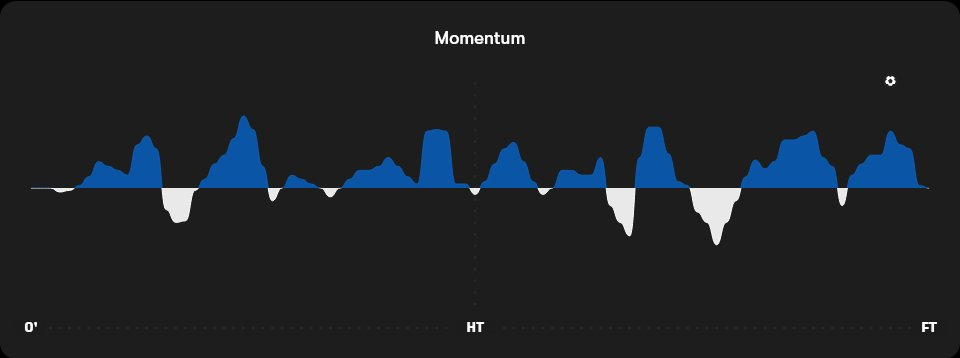

In [50]:
json_momentum = data['content']['momentum']['main']['data']
momentum_df = pd.json_normalize(json_momentum)
momentum_df

minute  value
0     0.00      0
1     1.00      0
2     2.00      0
3     3.00     -5
4     4.00     -3
..     ...    ...
89   88.00     71
90   89.00     54
91   90.00     49
92   90.50      3
93   90.75      0

[94 rows x 2 columns]

In [51]:
momentum = data['content']['matchFacts']['momentum']['main']['data']
momentum_data = pd.json_normalize(momentum)
momentum_data

minute  value
0      1.0      0
1      2.0      0
2      3.0     -5
3      4.0     -3
4      5.0      3
..     ...    ...
87    87.0     41
88    88.0     71
89    89.0     54
90    90.0     49
91    90.5      3

[92 rows x 2 columns]

**POTM**
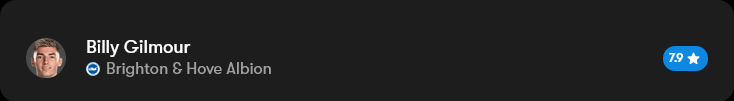

In [52]:
data['content']['matchFacts']['playerOfTheMatch']

{'id': 942549,
 'name': {'firstName': 'Billy',
  'lastName': 'Gilmour',
  'fullName': 'Billy Gilmour'},
 'teamName': 'Brighton & Hove Albion',
 'teamId': 10204,
 'rating': {'num': '7.9',
  'isTop': {'isTopRating': True, 'isMatchFinished': True}},
 'minutesPlayed': 89,
 'shotmap': [{'id': 2628792239,
   'eventType': 'AttemptSaved',
   'teamId': 10204,
   'playerId': 942549,
   'playerName': 'Billy Gilmour',
   'x': 83.8364077672,
   'y': 27.698571428000005,
   'min': 48,
   'minAdded': None,
   'isBlocked': False,
   'isOnTarget': True,
   'blockedX': 103.00862068980001,
   'blockedY': 32.6275,
   'goalCrossedY': 34.38125,
   'goalCrossedZ': 0.4879999976,
   'expectedGoals': 0.03835541382431984,
   'expectedGoalsOnTarget': 0.0229,
   'shotType': 'RightFoot',
   'situation': 'RegularPlay',
   'period': 'SecondHalf',
   'isOwnGoal': False,
   'onGoalShot': {'x': 0.8991402116402113,
    'y': 0.12910052846560846,
    'zoomRatio': 1},
   'isSavedOffLine': False,
   'teamColor': '#0850A0'}],


**Match Events/Timeline**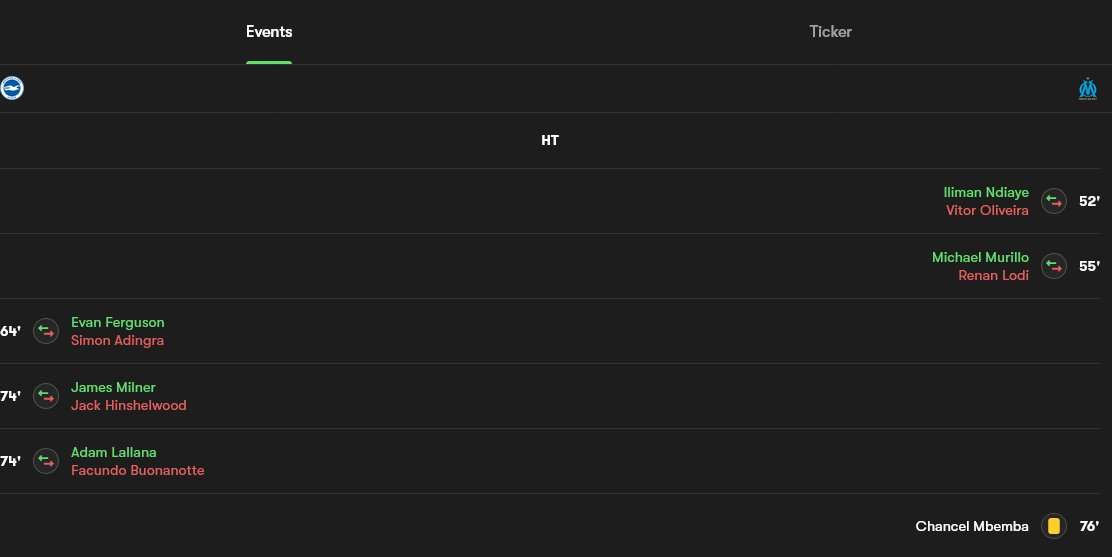

In [53]:
events_json = data['content']['matchFacts']['events']['events']
events = pd.json_normalize(events_json)
events

reactKey timeStr          type  time  overloadTime  \
0    45HalfNaNundefinedundefined      45          Half    45           NaN   
1   52SubstitutionNaN965764false      52  Substitution    52           0.0   
2   55SubstitutionNaN643635false      55  Substitution    55           0.0   
3   64SubstitutionNaN1068482true      64  Substitution    64           0.0   
4     74SubstitutionNaN38807true      74  Substitution    74           0.0   
5     74SubstitutionNaN37234true      74  Substitution    74           0.0   
6     76Card277761undefinedfalse      76          Card    76           NaN   
7   78SubstitutionNaN214972false      78  Substitution    78           0.0   
8   78SubstitutionNaN771294false      78  Substitution    78           0.0   
9       79Card37234undefinedtrue      79          Card    79           NaN   
10   79Card1073143undefinedfalse      79          Card    79           NaN   
11     84Card862608undefinedtrue      84          Card    84           NaN   
12    88Goal1021382undefinedtrue      88          Goal    88           NaN   
13    89Card1021382undefinedtrue      89          Card    89           NaN   
14  90SubstitutionNaN1352713true      90  Substitution    90           0.0   
15   90SubstitutionNaN304455true      90  Substitution    90           0.0   
16    90Card771294undefinedfalse  90 + 4          Card    90           4.0   
17     90Card107917undefinedtrue  90 + 5          Card    90           5.0   
18   90HalfNaNundefinedundefined      90          Half    90           NaN   

   halfStrShort      halfStrKey  player.id                 player.profileUrl  \
0            HT  halftime_short        NaN                                     
1           NaN             NaN        NaN                                     
2           NaN             NaN        NaN                                     
3           NaN             NaN        NaN                                     
4           NaN             NaN        NaN                                     
5           NaN             NaN        NaN                                     
6           NaN             NaN   277761.0    /players/277761/chancel-mbemba   
7           NaN             NaN        NaN                                     
8           NaN             NaN        NaN                                     
9           NaN             NaN    37234.0       /players/37234/adam-lallana   
10          NaN             NaN  1073143.0  /players/1073143/azzedine-ounahi   
11          NaN             NaN   862608.0      /players/862608/kaoru-mitoma   
12          NaN             NaN  1021382.0       /players/1021382/joao-pedro   
13          NaN             NaN  1021382.0       /players/1021382/joao-pedro   
14          NaN             NaN        NaN                                     
15          NaN             NaN        NaN                                     
16          NaN             NaN   771294.0      /players/771294/ismaila-sarr   
17          NaN             NaN   107917.0      /players/107917/jason-steele   
18           FT  fulltime_short        NaN                                     

                          profileUrl  ... shotmapEvent.period  \
0                                NaN  ...                 NaN   
1                                     ...                 NaN   
2                                     ...                 NaN   
3                                     ...                 NaN   
4                                     ...                 NaN   
5                                     ...                 NaN   
6     /players/277761/chancel-mbemba  ...                 NaN   
7                                     ...                 NaN   
8                                     ...                 NaN   
9        /players/37234/adam-lallana  ...                 NaN   
10  /players/1073143/azzedine-ounahi  ...                 NaN   
11      /players/862608/kaoru-mitoma  ...                 NaN   
12       /players

***

# WhoScored

In [54]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd
from pandas import json_normalize
import json
chrome_driver_path = r"C:\Users\Al Raven\anaconda3\Lib\site-packages\selenium\webdriver\chrome\chromedriver.exe"

In [55]:
#scraping code inspired by Varun Vasudevan (@TheDevilsDNA)
driver = webdriver.Chrome()
df1 = pd.DataFrame()
links = ['https://www.whoscored.com/Matches/1775737/Live/Europe-Europa-League-2023-2024-Marseille-Ajax']

wait = WebDriverWait(driver, 20)  # Increase time if needed

for i in links:    
    driver.get(i)
    
    # Close ad or accept cookies (replace with the actual element)
    try:
        close_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="some-button-id"]')))
        close_button.click()
    except:
        pass
    
    # Wait for the overlay to disappear (if it does so automatically)
    wait.until(EC.invisibility_of_element((By.ID, 'qc-cmp2-ui')))
    
    match_centre = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="sub-navigation"]/ul/li[4]/a')))
    match_centre.click()
    
    element = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/script[1]')))
    match_centre = driver.find_element("xpath",'//*[@id="sub-navigation"]/ul/li[4]/a')
    match_centre.click()
    element = driver.find_element("xpath",'//*[@id="layout-wrapper"]/script[1]')
    script_content = element.get_attribute('innerHTML')
    script_ls = script_content.split(sep="  ")
    script_ls = list(filter(None, script_ls))
    script_ls = [name for name in script_ls if name.strip()]
    dictstring = script_ls[2][17:-2]
    content = json.loads(dictstring)
    match = json_normalize(content['events'],sep='_')
    hometeam = content['home']['name']
    awayteam = content['away']['name']
    homeid = content['home']['teamId']
    awayid = content['away']['teamId']
    players = pd.DataFrame()
    homepl = json_normalize(content['home']['players'],sep='_')[['name', 'position', 'shirtNo', 'playerId']]
    awaypl = json_normalize(content['away']['players'],sep='_')[['name', 'position', 'shirtNo', 'playerId']]
    players = pd.concat([homepl,awaypl])
    match = match.merge(players, how='left')
    df1 = pd.concat([df1, match])
    #match_id += 1
    driver.close()

In [56]:
df1.type_displayName.unique()

array(['Start', 'Pass', 'BlockedPass', 'Dispossessed', 'Tackle',
       'BallRecovery', 'Clearance', 'SavedShot', 'Save', 'CornerAwarded',
       'BallTouch', 'Interception', 'Aerial', 'TakeOn', 'Foul', 'Goal',
       'PenaltyFaced', 'Challenge', 'MissedShots', 'OffsideGiven',
       'OffsidePass', 'OffsideProvoked', 'KeeperPickup', 'Smother', 'End',
       'SubstitutionOff', 'SubstitutionOn', 'Claim', 'ShieldBallOpp',
       'Card', 'KeeperSweeper', 'FormationChange', 'Error',
       'FormationSet'], dtype=object)

In [57]:
#selecting all passes
df_passes = df1.loc[df1['type_displayName']=='Pass']
df_passes

id  eventId  minute  second  teamId     x     y  \
2     2.623064e+09        3       0     0.0     249  50.0  50.0   
3     2.623064e+09        4       0     1.0     249  49.3  54.3   
4     2.623064e+09        5       0     2.0     249  39.3  46.4   
5     2.623064e+09        6       0     5.0     249  32.0  61.1   
6     2.623064e+09        7       0     7.0     249  34.5  90.0   
...            ...      ...     ...     ...     ...   ...   ...   
1465  2.623124e+09      793      96    55.0     249  15.8  57.5   
1466  2.623124e+09      794      96    59.0     249  36.9  51.8   
1467  2.623124e+09      795      97     3.0     249  10.7  44.2   
1468  2.623124e+09      796      97     7.0     249  43.1   4.0   
1472  2.623125e+09      798      98     8.0     249  58.2  11.3   

      expandedMinute                                         qualifiers  \
2                  0  [{'type': {'value': 140, 'displayName': 'PassE...   
3                  0  [{'type': {'value': 213, 'displayName': 'Angle...   
4                  0  [{'type': {'value': 56, 'displayName': 'Zone'}...   
5                  0  [{'type': {'value': 212, 'displayName': 'Lengt...   
6                  0  [{'type': {'value': 178, 'displayName': 'Stand...   
...              ...                                                ...   
1465              98  [{'type': {'value': 212, 'displayName': 'Lengt...   
1466              98  [{'type': {'value': 213, 'displayName': 'Angle...   
1467              99  [{'type': {'value': 141, 'displayName': 'PassE...   
1468              99  [{'type': {'value': 213, 'displayName': 'Angle...   
1472             100  [{'type': {'value': 140, 'displayName': 'PassE...   

                            satisfiedEventsTypes  ...  blockedY  goalMouthZ  \
2                [91, 117, 30, 35, 37, 216, 218]  ...       NaN         NaN   
3                [91, 117, 30, 35, 38, 216, 218]  ...       NaN         NaN   
4                [91, 117, 30, 35, 37, 215, 218]  ...       NaN         NaN   
5                [91, 117, 30, 35, 37, 215, 218]  ...       NaN         NaN   
6                [91, 117, 30, 36, 37, 216, 218]  ...       NaN         NaN   
...                                          ...  ...       ...         ...   
1465  [91, 118, 120, 124, 128, 36, 37, 216, 218]  ...       NaN         NaN   
1466             [91, 117, 30, 35, 38, 215, 218]  ...       NaN         NaN   
1467       [91, 117, 124, 127, 36, 38, 216, 218]  ...       NaN         NaN   
1468             [91, 117, 30, 36, 37, 216, 218]  ...       NaN         NaN   
1472   [91, 120, 29, 124, 133, 36, 37, 217, 218]  ...       NaN         NaN   

     goalMouthY  isShot isGoal  cardType_value cardType_displayName  \
2           NaN     NaN    NaN             NaN                  NaN   
3           NaN     NaN    NaN             NaN                  NaN   
4           NaN     NaN    NaN             NaN                  NaN   
5           NaN     NaN    NaN             NaN                  NaN   
6           NaN     NaN    NaN             NaN                  NaN   
...         ...     ...    ...             ...                  ...   
1465        NaN     NaN    NaN             NaN                  NaN   
1466        NaN     NaN    NaN             NaN                  NaN   
1467        NaN     NaN    NaN             NaN                  NaN   
1468        NaN     NaN    NaN             NaN                  NaN   
1472        NaN     NaN    NaN             NaN                  NaN   

                           name  position  shirtNo  
2     Pierre-Emerick Aubameyang        FW     10.0  
3                   Amine Harit        FW     11.0  
4            Geoffrey Kondogbia        MC     19.0  
5                Chancel Mbemba        DC     99.0  
6                    Renan Lodi        DL     12.0  
...                         ...       ...      ...  
1465                  Pau López        GK     16.0  
1466         Geoffrey Kondogbia        MC     19.0  
1467                  Pau López

In [58]:
#selecting all touches
df_touches = df1.loc[df1['type_displayName']=='BallTouch']
df_touches

id  eventId  minute  second  teamId     x     y  \
29    2.623065e+09       19       1    10.0     249  91.6  41.4   
30    2.623075e+09      166       1    10.0     130   7.9  59.5   
40    2.623079e+09      201       1    19.0     249  93.9  55.9   
47    2.623131e+09      803       1    53.0     249  52.8  90.9   
48    2.623065e+09       27       1    55.0     130  54.5  18.3   
77    2.623066e+09       52       3    31.0     130  46.6  29.1   
91    2.623067e+09       44       3    55.0     249  62.9  34.3   
110   2.623067e+09       67       4    52.0     130  53.8  63.6   
153   2.623070e+09       71       9    21.0     249  24.4  63.7   
181   2.623071e+09       87      11    16.0     249  63.7  94.4   
303   2.623076e+09      149      17    44.0     249  65.2  26.4   
339   2.623077e+09      216      19    35.0     130  60.2  97.2   
453   2.623082e+09      274      27    11.0     130  36.2  96.4   
471   2.623083e+09      235      29     5.0     249  36.8  41.6   
490   2.623084e+09      253      31    14.0     249  82.2  68.8   
502   2.623085e+09      260      32     1.0     249  50.2  38.5   
566   2.623087e+09      301      35    56.0     249  53.4  22.0   
567   2.623087e+09      328      35    56.0     130  47.6  76.5   
607   2.623089e+09      329      39     4.0     249  12.5  15.5   
623   2.623090e+09      365      39    48.0     130  87.1  21.2   
649   2.623091e+09      336      40    54.0     249  64.9  11.4   
701   2.623093e+09      371      44    24.0     249  80.0  20.2   
760   2.623097e+09      404      45    48.0     249  31.4   4.0   
795   2.623098e+09      420      48    59.0     249  49.4  12.4   
820   2.623099e+09      426      50    13.0     249  13.1  97.5   
867   2.623132e+09      840      54    10.0     130  39.4  27.5   
939   2.623104e+09      485      58     2.0     249  36.3   3.7   
940   2.623104e+09      559      58     3.0     130  59.0  92.9   
986   2.623105e+09      599      59    57.0     130  70.9   2.6   
1048  2.623109e+09      621      67     6.0     130  38.6   5.5   
1123  2.623111e+09      598      71    42.0     249  83.0  45.6   
1228  2.623114e+09      663      77    52.0     249  77.4  41.0   
1272  2.623116e+09      727      81    49.0     130  29.5  29.1   
1301  2.623117e+09      746      83    24.0     130  64.7  67.7   
1367  2.623119e+09      729      87    26.0     249  70.0  62.9   
1403  2.623120e+09      756      89     5.0     249  87.8   7.6   
1415  2.623121e+09      807      90    14.0     130   0.2  62.8   
1442  2.623124e+09      824      95     6.0     130  73.9  34.6   
1443  2.623124e+09      778      95     6.0     249  25.9  66.6   
1473  2.623125e+09      834      98     9.0     130  31.9  86.2   

      expandedMinute                                         qualifiers  \
29                 1  [{'type': {'value': 56, 'displayName': 'Zone'}...   
30                 1  [{'type': {'value': 56, 'displayName': 'Zone'}...   
40                 1  [{'type': {'value': 15, 'displayName': 'Head'}...   
47                 1  [{'type': {'value': 56, 'displayName': 'Zone'}...   
48                 1  [{'type': {'value': 178, 'displayName': 'Stand...   
77                 3  [{'type': {'value': 178, 'displayName': 'Stand...   
91                 3  [{'type': {'value': 178, 'displayName': 'Stand...   
110                4  [{'type': {'value': 178, 'displayName': 'Stand...   
153                9  [{'type': {'value': 178, 'displayName': 'Stand...   
181               11  [{'type': {'value': 56, 'displayName': 'Zone'}...   
303               17  [{'type': {'value': 178, 'displayName': 'Stand...   
339               19  [{'type': {'value': 178, 'displayName': 'Stand...   
453               27  [{'type': {'value': 178, 'displayName': 'Stand...   
471               29  [{'type': {'value': 56, 'displayName': 'Zone'}...   
490               31  [{'type': {'value': 56, 'displayName': 'Zone'}...   
502               32  [{'type': {'value': 56, 'displayName': 'Zone'}

In [59]:
#selecting all shots ('isShot' column)
df_shots = df1.loc[df1['isShot']==True]
df_shots

id  eventId  minute  second  teamId     x     y  \
24    2.623065e+09       16       0    41.0     249  92.2  36.1   
38    2.623065e+09       24       1    18.0     249  94.4  53.0   
112   2.623067e+09       57       5     1.0     249  88.1  26.2   
117   2.623068e+09       61       5    36.0     249  90.6  63.3   
145   2.623069e+09       69       8    11.0     249  88.5  50.0   
157   2.623070e+09      101       9    28.0     130  96.3  57.0   
237   2.623073e+09      155      13    35.0     130  89.5  42.3   
269   2.623074e+09      130      15    49.0     249  93.5  63.2   
446   2.623081e+09      218      25    46.0     249  93.2  48.1   
464   2.623083e+09      232      28    30.0     249  80.0  12.0   
474   2.623083e+09      287      29    14.0     130  90.9  49.8   
619   2.623090e+09      362      39    40.0     130  69.0  27.6   
689   2.623093e+09      364      43    52.0     249  71.0  30.8   
779   2.623097e+09      413      46    53.0     249  92.6  56.5   
880   2.623102e+09      457      54    42.0     249  96.0  34.0   
917   2.623103e+09      548      56    23.0     130  95.1  63.1   
972   2.623104e+09      586      59    29.0     130  91.5  37.9   
1005  2.623107e+09      508      63    47.0     249  76.5  39.6   
1011  2.623107e+09      512      64    18.0     249  80.5  54.6   
1053  2.623109e+09      555      67    21.0     249  85.6  29.1   
1250  2.623115e+09      718      78    56.0     130  95.2  56.2   
1357  2.623119e+09      723      87     4.0     249  78.8  34.2   
1380  2.623119e+09      738      87    51.0     249  88.3  56.9   
1419  2.623122e+09      767      92    21.0     249  88.5  50.0   
1447  2.623124e+09      780      95    45.0     249  99.3  34.2   
1455  2.623124e+09      784      96    21.0     249  77.4  49.5   

      expandedMinute                                         qualifiers  \
24                 0  [{'type': {'value': 154, 'displayName': 'Inten...   
38                 1  [{'type': {'value': 55, 'displayName': 'Relate...   
112                5  [{'type': {'value': 22, 'displayName': 'Regula...   
117                5  [{'type': {'value': 20, 'displayName': 'RightF...   
145                8  [{'type': {'value': 214, 'displayName': 'BigCh...   
157                9  [{'type': {'value': 22, 'displayName': 'Regula...   
237               13  [{'type': {'value': 56, 'displayName': 'Zone'}...   
269               15  [{'type': {'value': 103, 'displayName': 'GoalM...   
446               25  [{'type': {'value': 29, 'displayName': 'Assist...   
464               28  [{'type': {'value': 22, 'displayName': 'Regula...   
474               29  [{'type': {'value': 72, 'displayName': 'LeftFo...   
619               39  [{'type': {'value': 22, 'displayName': 'Regula...   
689               43  [{'type': {'value': 146, 'displayName': 'Block...   
779               48  [{'type': {'value': 56, 'displayName': 'Zone'}...   
880               56  [{'type': {'value': 29, 'displayName': 'Assist...   
917               58  [{'type': {'value': 15, 'displayName': 'Head'}...   
972               61  [{'type': {'value': 147, 'displayName': 'Block...   
1005              65  [{'type': {'value': 102, 'displayName': 'GoalM...   
1011              66  [{'type': {'value': 56, 'displayName': 'Zone'}...   
1053              69  [{'type': {'value': 178, 'displayName': 'Stand...   
1250              80  [{'type': {'value': 15, 'displayName': 'Head'}...   
1357              89  [{'type': {'value': 20, 'displayName': 'RightF...   
1380              89  [{'type': {'value': 76, 'displayName': 'LowLef...   
1419              94  [{'type': {'value': 56, 'displayName': 'Zone'}...   
1447              97  [{'type': {'value': 178, 'displayName': 'Stand...   
1455              98  [{'type': {'value': 25, 'displayName': 'FromCo...   

                            satisfiedEventsTypes  ...  blockedY  goalMouthZ  \
24                         [91, 9, 10, 1, 3, 12]  ...      35.9        26.6   
38                   [

In [60]:
#selecting all goals
df_goals = df1.loc[df1['type_displayName']=='Goal']
df_goals

id  eventId  minute  second  teamId     x     y  \
145   2.623069e+09       69       8    11.0     249  88.5  50.0   
157   2.623070e+09      101       9    28.0     130  96.3  57.0   
446   2.623081e+09      218      25    46.0     249  93.2  48.1   
474   2.623083e+09      287      29    14.0     130  90.9  49.8   
779   2.623097e+09      413      46    53.0     249  92.6  56.5   
1250  2.623115e+09      718      78    56.0     130  95.2  56.2   
1419  2.623122e+09      767      92    21.0     249  88.5  50.0   

      expandedMinute                                         qualifiers  \
145                8  [{'type': {'value': 214, 'displayName': 'BigCh...   
157                9  [{'type': {'value': 22, 'displayName': 'Regula...   
446               25  [{'type': {'value': 29, 'displayName': 'Assist...   
474               29  [{'type': {'value': 72, 'displayName': 'LeftFo...   
779               48  [{'type': {'value': 56, 'displayName': 'Zone'}...   
1250              80  [{'type': {'value': 15, 'displayName': 'Head'}...   
1419              94  [{'type': {'value': 56, 'displayName': 'Zone'}...   

                            satisfiedEventsTypes  ...  blockedY  goalMouthZ  \
145          [91, 22, 9, 10, 202, 1, 12, 17, 25]  ...       NaN         0.6   
157   [91, 24, 9, 10, 202, 0, 3, 13, 16, 19, 26]  ...       NaN         5.7   
446   [91, 24, 9, 10, 202, 1, 5, 14, 17, 21, 27]  ...       NaN        24.7   
474   [91, 24, 9, 10, 202, 1, 3, 13, 17, 19, 26]  ...       NaN        11.4   
779        [91, 24, 9, 10, 1, 3, 12, 17, 19, 25]  ...       NaN         9.5   
1250  [91, 24, 9, 10, 202, 0, 3, 14, 16, 19, 27]  ...       NaN         8.9   
1419         [91, 22, 9, 10, 202, 1, 12, 17, 25]  ...       NaN         1.9   

     goalMouthY  isShot isGoal  cardType_value cardType_displayName  \
145        48.2    True   True             NaN                  NaN   
157        54.0    True   True             NaN                  NaN   
446        54.0    True   True             NaN                  NaN   
474        53.9    True   True             NaN                  NaN   
779        48.3    True   True             NaN                  NaN   
1250       53.6    True   True             NaN                  NaN   
1419       47.7    True   True             NaN                  NaN   

                           name  position  shirtNo  
145   Pierre-Emerick Aubameyang        FW     10.0  
157               Brian Brobbey        FW      9.0  
446              Chancel Mbemba        DC     99.0  
474               Brian Brobbey        FW      9.0  
779   Pierre-Emerick Aubameyang        FW     10.0  
1250                Chuba Akpom       Sub     10.0  
1419  Pierre-Emerick Aubameyang        FW     10.0  

[7 rows x 33 columns]

In [61]:
#selecting all defensive actions: 
df_defensive_actions = df1.loc[(df1.type_displayName=='Challenge') | (df1.type_displayName=='BallRecovery')| 
        (df1.type_displayName=='BlockedPass')|
        (df1.type_displayName=='Tackle')|
        (df1.type_displayName=='Interception')|
        (df1.type_displayName=='Foul')]
df_defensive_actions

id  eventId  minute  second  teamId     x     y  \
8     2.623066e+09       49       0     9.0     130  53.8   8.4   
10    2.623064e+09        3       0    12.0     130  44.3   4.4   
11    2.623064e+09        4       0    13.0     130  45.1   7.8   
21    2.623065e+09       13       0    36.0     249  58.1  62.2   
22    2.623065e+09       14       0    37.0     249  63.6  50.5   
...            ...      ...     ...     ...     ...   ...   ...   
1444  2.623124e+09      776      95     8.0     249  24.8  63.6   
1445  2.623124e+09      823      95     8.0     130  75.2  36.4   
1460  2.623124e+09      788      96    40.0     249  24.6  80.1   
1469  2.623124e+09      797      97    12.0     249  53.3   4.5   
1470  2.623124e+09      832      97    12.0     130  46.7  95.5   

      expandedMinute                                         qualifiers  \
8                  0  [{'type': {'value': 56, 'displayName': 'Zone'}...   
10                 0  [{'type': {'value': 56, 'displayName': 'Zone'}...   
11                 0                                                 []   
21                 0  [{'type': {'value': 233, 'displayName': 'Oppos...   
22                 0                                                 []   
...              ...                                                ...   
1444              97  [{'type': {'value': 242, 'displayName': 'Obstr...   
1445              97  [{'type': {'value': 56, 'displayName': 'Zone'}...   
1460              98                                                 []   
1469              99  [{'type': {'value': 13, 'displayName': 'Foul'}...   
1470              99  [{'type': {'value': 13, 'displayName': 'Foul'}...   

     satisfiedEventsTypes  ...  blockedY  goalMouthZ goalMouthY  isShot  \
8                [91, 60]  ...       NaN         NaN        NaN     NaN   
10              [91, 143]  ...       NaN         NaN        NaN     NaN   
11                   [93]  ...       NaN         NaN        NaN     NaN   
21              [91, 143]  ...       NaN         NaN        NaN     NaN   
22                   [93]  ...       NaN         NaN        NaN     NaN   
...                   ...  ...       ...         ...        ...     ...   
1444             [91, 63]  ...       NaN         NaN        NaN     NaN   
1445                 [64]  ...       NaN         NaN        NaN     NaN   
1460                 [93]  ...       NaN         NaN        NaN     NaN   
1469             [91, 63]  ...       NaN         NaN        NaN     NaN   
1470                 [64]  ...       NaN         NaN        NaN     NaN   

     isGoal  cardType_value cardType_displayName                name  \
8       NaN             NaN                  NaN         Anton Gaaei   
10      NaN             NaN                  NaN  Benjamin Tahirovic   
11      NaN             NaN                  NaN         Anton Gaaei   
21      NaN             NaN                  NaN     Jordan Veretout   
22      NaN             NaN                  NaN         Amine Harit   
...     ...             ...                  ...                 ...   
1444    NaN             NaN                  NaN        Samuel Gigot   
1445    NaN             NaN                  NaN   Kristian Hlynsson   
1460    NaN             NaN                  NaN        Amir Murillo   
1469    NaN             NaN                  NaN        Ismaïla Sarr   
1470    NaN             NaN                  NaN         Jorrel Hato   

      position  shirtNo  
8           DR      3.0  
10         DMC     33.0  
11          DR      3.0  
21          MC     27.0  
22          FW     11.0  
...        ...      ...  
1444        DC      4.0  
1445       Sub     38.0  
1460       Sub     62.0  
1469        MR     23.0  
1470        DC      4.0  

[183 rows x 33 columns]

In [62]:
#scraping code and data prep inspired by Karol Działowski: https://www.dzialowski.eu/football-data-visualisations/
import re
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r',encoding="utf8")
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')

    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict, players_ids
match_html_path = r"C:\Users\Al Raven\Documents\Football\Marseille 4-3 Ajax - Europa League 2023_2024 Live.html"
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict, players_ids = extract_data_from_dict(data)

In [63]:
events_dict

[{'id': 2623064385.0,
  'eventId': 2,
  'minute': 0,
  'second': 0,
  'teamId': 130,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2623064375.0,
  'eventId': 2,
  'minute': 0,
  'second': 0,
  'teamId': 249,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2623064421.0,
  'eventId': 3,
  'minute': 0,
  'second': 0,
  'teamId': 249,
  'playerId': 44120,
  'x': 50.0,
  'y': 50.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 1, 'displayName': 'Pass'},
  'outcomeTy

In [64]:
players_df.head()

playerId  shirtNo             name position  height  weight  age  \
0    145427       16        Pau López       GK     189      77   28   
1    301869        7  Jonathan Clauss       DR     178      69   31   
2    104368       99   Chancel Mbemba       DC     182      81   29   
3    234376        4     Samuel Gigot       DC     187      83   30   
4    326646       12       Renan Lodi       DL     173      68   25   

  isFirstEleven  isManOfTheMatch field  \
0          True            False  home   
1          True            False  home   
2          True            False  home   
3          True            False  home   
4          True            False  home   

                                               stats  subbedInPlayerId  \
0  {'totalSaves': {'13': 1.0, '58': 1.0, '61': 1....               NaN   
1  {'possession': {'1': 2.0, '4': 1.0, '5': 1.0, ...               NaN   
2  {'possession': {'0': 1.0, '3': 1.0, '4': 2.0, ...               NaN   
3  {'possession': {'3': 2.0, '4': 2.0, '10': 1.0,...               NaN   
4  {'possession': {'0': 1.0, '3': 1.0, '4': 2.0, ...          280972.0   

                             subbedOutPeriod  subbedOutExpandedMinute  \
0                                        NaN                      NaN   
1                                        NaN                      NaN   
2                                        NaN                      NaN   
3                                        NaN                      NaN   
4  {'value': 2, 'displayName': 'SecondHalf'}                     88.0   

  subbedInPeriod  subbedInExpandedMinute  subbedOutPlayerId  teamId  
0            NaN                     NaN                NaN     249  
1            NaN                     NaN                NaN     249  
2            NaN                     NaN                NaN     249  
3            NaN                     NaN                NaN     249  
4            NaN                     NaN                NaN     249

In [65]:
players_df.columns

Index(['playerId', 'shirtNo', 'name', 'position', 'height', 'weight', 'age',
       'isFirstEleven', 'isManOfTheMatch', 'field', 'stats',
       'subbedInPlayerId', 'subbedOutPeriod', 'subbedOutExpandedMinute',
       'subbedInPeriod', 'subbedInExpandedMinute', 'subbedOutPlayerId',
       'teamId'],
      dtype='object')

In [66]:
#passes dataframe
def get_passes_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType"]]

    return df_passes
passes_df = get_passes_df(events_dict)

In [67]:
#selecting Marseille's passes only (teamId=249)
h_passes = passes_df[passes_df['teamId']==249]
#Marseille passes IN opponent's half
h_opphalf_passes = h_passes[h_passes['x']>=50]
#Marseille's passes in their own half
h_ownhalf_passes = h_passes[h_passes['x']<50]
#Marseille passes INTO the final third
h_final_3rd_passes = h_passes[h_passes['endX']>=66]
h_final_3rd_passes = h_final_3rd_passes[h_final_3rd_passes['x']<=66]
#Marseille's completed passes into the final third
h_comp_final3rd_passes = h_final_3rd_passes[h_final_3rd_passes['outcomeType']=='Successful']
#Marseille's passes into the opponent's box
h_passes_intobox = h_passes[h_passes['endX']>=85]
h_passes_intobox = h_passes_intobox[h_passes_intobox['endY']<=80]
h_passes_intobox = h_passes_intobox[h_passes_intobox['endY']>=20]
#Marseille's COMPLETED/SUCCESSFUL passes into the opponent's box
h_comp_passes_intobox = h_passes_intobox[h_passes_intobox['outcomeType']=='Successful']
#Same pass dataframes for Ajax
a_passes = passes_df[passes_df['teamId']==130]
a_opphalf_passes = a_passes[a_passes['x']>=50]
a_ownhalf_passes = a_passes[a_passes['x']<50]
a_final_3rd_passes = a_passes[a_passes['endX']>=66]
a_final_3rd_passes = a_final_3rd_passes[a_final_3rd_passes['x']<=66]
a_comp_final3rd_passes = a_final_3rd_passes[a_final_3rd_passes['outcomeType']=='Successful']
a_passes_intobox = a_passes[a_passes['endX']>=85]
a_passes_intobox = a_passes_intobox[a_passes_intobox['endY']<=80]
a_passes_intobox = a_passes_intobox[a_passes_intobox['endY']>=20]
a_comp_passes_intobox = a_passes_intobox[a_passes_intobox['outcomeType']=='Successful']

In [68]:
#shots dataframe
def get_shots_df(events_dict):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    #df["receiver"] = df["playerId"].shift(-1)

    # filter only shots
    shots_ids = df.index[df['eventType'] == 'Shot']
    df_shots = df.loc[
        shots_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "eventType", "outcomeType"]]
    # filter for only team

    return df_shots

In [69]:
#Marseille's shots and goals
home_shots = df_shots[df_shots["teamId"] == 249]
home_goals = home_shots[home_shots['isGoal']==True]

#Ajax's shots
away_shots = df_shots[df_shots["teamId"] == 130]
away_goals = away_shots[away_shots['isGoal']==True]

***

# Understat

In [70]:
import json
import pandas as pd

In [71]:
url = 'https://understat.com/match/22284'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [72]:
strings = scripts[1].string

In [73]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22532752\\x22,\\x22minute\\x22\\x3A\\x2210\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.8930000305175781\\x22,\\x22Y\\x22\\x3A\\x220.32\\x22,\\x22xG\\x22\\x3A\\x220.059324927628040314\\x22,\\x22player\\x22\\x3A\\x22Marcus\\x20Rashford\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x22556\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2222284\\x22,\\x22h_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22a_team\\x22\\x3A\\x22Wolverhampton\\x20Wanderers\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x220\\x22,\\x22date\\x22\\x3A\\x222023\\x2D08\\x2D14\\x2019\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Antony\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22532753\\x22,\\x22minute\\x22\\x3A\\x2212\\x22,\\x22re

In [74]:
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [75]:
data

{'h': [{'id': '532752',
   'minute': '10',
   'result': 'SavedShot',
   'X': '0.8930000305175781',
   'Y': '0.32',
   'xG': '0.059324927628040314',
   'player': 'Marcus Rashford',
   'h_a': 'h',
   'player_id': '556',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'RightFoot',
   'match_id': '22284',
   'h_team': 'Manchester United',
   'a_team': 'Wolverhampton Wanderers',
   'h_goals': '1',
   'a_goals': '0',
   'date': '2023-08-14 19:00:00',
   'player_assisted': 'Antony',
   'lastAction': 'Pass'},
  {'id': '532753',
   'minute': '12',
   'result': 'BlockedShot',
   'X': '0.794000015258789',
   'Y': '0.655',
   'xG': '0.019552553072571754',
   'player': 'Alejandro Garnacho',
   'h_a': 'h',
   'player_id': '10552',
   'situation': 'FromCorner',
   'season': '2023',
   'shotType': 'RightFoot',
   'match_id': '22284',
   'h_team': 'Manchester United',
   'a_team': 'Wolverhampton Wanderers',
   'h_goals': '1',
   'a_goals': '0',
   'date': '2023-08-14 19:00:00',
   'play

In [76]:
x = []
y = []
xG = []
result = []
team = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
col_names = ['x','y','xG','result','team']
df = pd.DataFrame([x,y,xG,result,team],index=col_names)
df = df.T

In [77]:
df

x                    y                    xG  \
0   0.8930000305175781                 0.32  0.059324927628040314   
1    0.794000015258789                0.655  0.019552553072571754   
2   0.9159999847412109    0.500999984741211  0.060597602277994156   
3   0.7290000152587891   0.4179999923706055  0.016547512263059616   
4   0.8980000305175782   0.7240000152587891  0.045268017798662186   
5                 0.89                0.315  0.056723639369010925   
6                 0.88   0.3609999847412109   0.08383027464151382   
7   0.9209999847412109    0.514000015258789   0.10235649347305298   
8   0.8590000152587891    0.500999984741211   0.06346779316663742   
9    0.860999984741211                0.605   0.08149542659521103   
10  0.9419999694824219   0.3060000038146973   0.28685417771339417   
11               0.815   0.6509999847412109  0.034532465040683746   
12  0.9690000152587891   0.5109999847412109     0.789081335067749   
13  0.8640000152587891   0.6129999923706054   0.12816749513149261   
14  0.9690000152587891                0.455    0.1430738866329193   
15  0.7369999694824219  0.35200000762939454    0.0168922059237957   
16  0.8880000305175781   0.6329999923706054  0.017458826303482056   
17  0.8590000152587891    0.649000015258789   0.06396590173244476   
18               0.695   0.5840000152587891  0.011781368404626846   
19   0.889000015258789  0.33799999237060546   0.11956710368394852   
20   0.980999984741211   0.3129999923706055   0.05218026041984558   
21  0.9169999694824219  0.44799999237060545   0.13522909581661224   
22  0.9690000152587891   0.5770000076293945   0.47149643301963806   
23  0.7569999694824219   0.5159999847412109  0.043524596840143204   
24  0.9230000305175782   0.5820000076293945   0.09806334227323532   
25               0.915   0.5629999923706055  0.040286704897880554   
26  0.7930000305175782   0.6809999847412109  0.019234422594308853   
27               0.875                 0.45   0.11975923925638199   
28  0.8669999694824219                 0.53    0.0986924096941948   
29  0.9459999847412109                0.395   0.07816250622272491   
30               0.905                0.435   0.08495936542749405   
31  0.9219999694824219   0.6029999923706054  0.017349420115351677   
32  0.9209999847412109  0.44599998474121094   0.08854648470878601   
33  0.8680000305175781   0.6569999694824219   0.06135891377925873   
34   0.789000015258789   0.4540000152587891   0.02470371127128601   
35  0.8490000152587891   0.5129999923706055  0.060725368559360504   
36  0.7930000305175782    0.624000015258789   0.01879335753619671   
37  0.9169999694824219   0.5659999847412109   0.04331051930785179   

         result                     team  
0     SavedShot        Manchester United  
1   BlockedShot        Manchester United  
2   BlockedShot        Manchester United  
3   BlockedShot        Manchester United  
4   MissedShots        Manchester United  
5   BlockedShot        Manchester United  
6   BlockedShot        Manchester United  
7   MissedShots        Manchester United  
8   BlockedShot        Manchester United  
9   BlockedShot        Manchester United  
10  BlockedShot        Manchester United  
11  MissedShots        Manchester United  
12         Goal        Manchester United  
13  BlockedShot        Manchester United  
14  MissedShots        Manchester United  
15  BlockedShot  Wolverhampton Wanderers  
16  BlockedShot  Wolverhampton Wanderers  
17  BlockedShot  Wolverhampton Wanderers  
18  BlockedShot  Wolverhampton Wanderers  
19  MissedShots  Wolverhampton Wanderers  
20    SavedShot  Wolverhampton Wanderers  
21  MissedShots  Wolverhampton Wanderers  
22   ShotOnPost  Wolverhampton Wanderers  
23    SavedShot  Wolverhampton Wanderers  
24  BlockedShot  Wolverhampton Wanderers  
25  MissedShots  Wolverhampton Wanderers  
26  MissedShots  Wolverhampton Wanderers  
27    SavedShot  Wolverhampton Wanderers  
28  MissedShots  Wolverhampton Wanderers  
29    SavedShot  Wolverhampton Wanderer

In [78]:
df_Utd = df.loc[df['team']=='Manchester United']

In [79]:
df_Utd

x                   y                    xG       result  \
0   0.8930000305175781                0.32  0.059324927628040314    SavedShot   
1    0.794000015258789               0.655  0.019552553072571754  BlockedShot   
2   0.9159999847412109   0.500999984741211  0.060597602277994156  BlockedShot   
3   0.7290000152587891  0.4179999923706055  0.016547512263059616  BlockedShot   
4   0.8980000305175782  0.7240000152587891  0.045268017798662186  MissedShots   
5                 0.89               0.315  0.056723639369010925  BlockedShot   
6                 0.88  0.3609999847412109   0.08383027464151382  BlockedShot   
7   0.9209999847412109   0.514000015258789   0.10235649347305298  MissedShots   
8   0.8590000152587891   0.500999984741211   0.06346779316663742  BlockedShot   
9    0.860999984741211               0.605   0.08149542659521103  BlockedShot   
10  0.9419999694824219  0.3060000038146973   0.28685417771339417  BlockedShot   
11               0.815  0.6509999847412109  0.034532465040683746  MissedShots   
12  0.9690000152587891  0.5109999847412109     0.789081335067749         Goal   
13  0.8640000152587891  0.6129999923706054   0.12816749513149261  BlockedShot   
14  0.9690000152587891               0.455    0.1430738866329193  MissedShots   

                 team  
0   Manchester United  
1   Manchester United  
2   Manchester United  
3   Manchester United  
4   Manchester United  
5   Manchester United  
6   Manchester United  
7   Manchester United  
8   Manchester United  
9   Manchester United  
10  Manchester United  
11  Manchester United  
12  Manchester United  
13  Manchester United  
14  Manchester United

***

# SofaScore

In [80]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [81]:
response = requests.get(
    'https://www.sofascore.com/west-ham-united-wolverhampton/dsM#id:11352508',
    headers={'User-Agent': 'Mozilla/5.0'} # you'll be blocked if you don't use some type of user agent
)
soup = BeautifulSoup(response.text, 'html.parser')

In [82]:
print(response.status_code)

200


In [83]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/116.0',
    'Accept': '*/*',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'Prefer': 'safe',
    'Referer': 'https://www.sofascore.com/',
    'Origin': 'https://www.sofascore.com',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'Sec-GPC': '1',
    'Cache-Control': 'max-age=0',
    # Requests doesn't support trailers
    # 'TE': 'trailers',
}

response_shotmap = requests.get('https://api.sofascore.com/api/v1/event/11352508/shotmap', headers=headers)

In [84]:
response_shotmap.status_code

200

In [85]:
shots = response_shotmap.json()

In [86]:
shots

{'shotmap': [{'player': {'name': 'Jean-Ricner Bellegarde',
    'slug': 'jean-ricner-bellegarde',
    'shortName': 'J.-R. Bellegarde',
    'position': 'M',
    'userCount': 784,
    'id': 845273},
   'isHome': False,
   'shotType': 'block',
   'situation': 'assisted',
   'playerCoordinates': {'x': 19.5, 'y': 25.8, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'low-centre',
   'goalMouthCoordinates': {'x': 0, 'y': 48.9, 'z': 19},
   'blockCoordinates': {'x': 8.4, 'y': 40.2, 'z': 0},
   'xg': 0.018672272562981,
   'id': 2407508,
   'time': 90,
   'addedTime': 2,
   'timeSeconds': 5491,
   'draw': {'start': {'x': 25.8, 'y': 19.5},
    'block': {'x': 40.2, 'y': 8.4},
    'end': {'x': 51.1, 'y': 0},
    'goal': {'x': 51.1, 'y': 81}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 809,
   'incidentType': 'shot'},
  {'player': {'name': 'James Ward-Prowse',
    'firstName': '',
    'lastName': '',
    'slug': 'james-ward-prowse',
    'shortName': 'J. Ward-Prowse',
 

In [87]:
shots['shotmap']

[{'player': {'name': 'Jean-Ricner Bellegarde',
   'slug': 'jean-ricner-bellegarde',
   'shortName': 'J.-R. Bellegarde',
   'position': 'M',
   'userCount': 784,
   'id': 845273},
  'isHome': False,
  'shotType': 'block',
  'situation': 'assisted',
  'playerCoordinates': {'x': 19.5, 'y': 25.8, 'z': 0},
  'bodyPart': 'right-foot',
  'goalMouthLocation': 'low-centre',
  'goalMouthCoordinates': {'x': 0, 'y': 48.9, 'z': 19},
  'blockCoordinates': {'x': 8.4, 'y': 40.2, 'z': 0},
  'xg': 0.018672272562981,
  'id': 2407508,
  'time': 90,
  'addedTime': 2,
  'timeSeconds': 5491,
  'draw': {'start': {'x': 25.8, 'y': 19.5},
   'block': {'x': 40.2, 'y': 8.4},
   'end': {'x': 51.1, 'y': 0},
   'goal': {'x': 51.1, 'y': 81}},
  'reversedPeriodTime': 1,
  'reversedPeriodTimeSeconds': 809,
  'incidentType': 'shot'},
 {'player': {'name': 'James Ward-Prowse',
   'firstName': '',
   'lastName': '',
   'slug': 'james-ward-prowse',
   'shortName': 'J. Ward-Prowse',
   'position': 'M',
   'userCount': 5591,
 

In [88]:
shots_df = pd.DataFrame(shots['shotmap'])

In [89]:
shots_df

player  isHome shotType  \
0   {'name': 'Jean-Ricner Bellegarde', 'slug': 'je...   False    block   
1   {'name': 'James Ward-Prowse', 'firstName': '',...    True     miss   
2   {'name': 'Jarrod Bowen', 'slug': 'jarrod-bowen...    True    block   
3   {'name': 'Jarrod Bowen', 'slug': 'jarrod-bowen...    True     goal   
4   {'name': 'Mario Lemina', 'firstName': '', 'las...   False     miss   
5   {'name': 'Hee-Chan Hwang', 'firstName': '', 'l...   False    block   
6   {'name': 'Lucas Paquetá', 'firstName': '', 'la...    True     miss   
7   {'name': 'Mario Lemina', 'firstName': '', 'las...   False     save   
8   {'name': 'Matheus Cunha', 'slug': 'matheus-cun...   False     miss   
9   {'name': 'Jean-Ricner Bellegarde', 'slug': 'je...   False     miss   
10  {'name': 'Hee-Chan Hwang', 'firstName': '', 'l...   False    block   
11  {'name': 'Nayef Aguerd', 'firstName': '', 'las...    True     miss   
12  {'name': 'Toti Gomes', 'firstName': '', 'lastN...   False    block   
13  {'name': 'Jarrod Bowen', 'slug': 'jarrod-bowen...    True     post   
14  {'name': 'Hee-Chan Hwang', 'firstName': '', 'l...   False    block   
15  {'name': 'Matheus Cunha', 'slug': 'matheus-cun...   False    block   
16  {'name': 'Vladimír Coufal', 'firstName': '', '...    True    block   
17  {'name': 'Mohammed Kudus', 'firstName': '', 'l...    True     goal   
18  {'name': 'Jean-Ricner Bellegarde', 'slug': 'je...   False    block   
19  {'name': 'Matheus Cunha', 'slug': 'matheus-cun...   False     save   
20  {'name': 'Mohammed Kudus', 'firstName': '', 'l...    True     goal   
21  {'name': 'Craig Dawson', 'slug': 'craig-dawson...   False     miss   
22  {'name': 'James Ward-Prowse', 'firstName': '',...    True     save   
23  {'name': 'Lucas Paquetá', 'firstName': '', 'la...    True     miss   
24  {'name': 'Matheus Cunha', 'slug': 'matheus-cun...   False     save   
25  {'name': 'Mohammed Kudus', 'firstName': '', 'l...    True    block   
26  {'name': 'Kurt Zouma', 'firstName': '', 'lastN...    True    block   

     situation               playerCoordinates    bodyPart goalMouthLocation  \
0     assisted  {'x': 19.5, 'y': 25.8, 'z': 0}  right-foot        low-centre   
1    free-kick  {'x': 23.5, 'y': 36.7, 'z': 0}  right-foot        close-left   
2     assisted  {'x': 18.5, 'y': 59.5, 'z': 0}   left-foot        low-centre   
3   fast-break  {'x': 11.7, 'y': 65.6, 'z': 0}  right-foot          low-left   
4     assisted    {'x': 25.4, 'y': 53, 'z': 0}  right-foot              high   
5     assisted  {'x': 25.1, 'y': 46.5, 'z': 0}   left-foot        low-centre   
6      regular  {'x': 23.1, 'y': 43.9, 'z': 0}   left-foot        high-right   
7     assisted  {'x': 23.3, 'y': 36.6, 'z': 0}  right-foot         low-right   
8     assisted  {'x': 12.6, 'y': 72.2, 'z': 0}  right-foot        close-high   
9       corner  {'x': 19.2, 'y': 32.9, 'z': 0}   left-foot              high   
10    assisted  {'x': 15.1, 'y': 57.6, 'z': 0}   left-foot          low-left   
11      corner   {'x': 8.4, 'y': 52.9, 'z': 0}        head   close-high-left   
12   set-piece   {'x': 9.9, 'y': 57.2, 'z': 0}   left-foot        low-centre   
13    assisted  {'x': 18.1, 'y': 49.9, 'z': 0}   left-foot             right   
14    assisted  {'x': 18.1, 'y': 47.4, 'z': 0}   left-foot          low-left   
15     regular  {'x': 16.5, 'y': 44.7, 'z': 0}  right-foot        low-centre   
16    assisted  {'x': 25.1, 'y': 60.3, 'z': 0}  right-foot        low-centre   
17  fast-break  {'x': 12.2, 'y': 61.7, 'z': 0}  right-foot          low-left   
18    assisted  {'x': 13.6, 'y': 39.5, 'z': 0}  right-foot        low-centre   
19    assisted  {'x': 25.7, 'y': 50.7, 'z': 0}  right-foot          low-left   
20  fast-break    {'x': 22, 'y': 60.5, 'z': 0}   left-foot         low-right   
21      corner       {'x': 8, 'y': 45, 'z': 0}        head             right   
22   free-kick  {'x': 30.6, 'y': 32.7, 'z': 0}  right-foot          low-left   
23    assisted  {'x': 11.1, 'y': 33.9, 'z': 0}   left-

In [90]:
#response_standings = requests.head('https://api.sofascore.com/api/v1/tournament/1/season/52186/standings/total', headers=headers)
#standings = response_standings.json()
#standings

In [91]:
#lineups

In [92]:
#...

In [93]:
response_bestplayers = requests.get('https://api.sofascore.com/api/v1/event/11352484/best-players', headers=headers)
best_players = response_bestplayers.json()
best_players

{'bestHomeTeamPlayer': {'value': '8.8',
  'label': 'rating',
  'player': {'name': 'Raheem Sterling',
   'slug': 'raheem-sterling',
   'shortName': 'R. Sterling',
   'position': 'F',
   'userCount': 29735,
   'id': 138534,
   'marketValueCurrency': 'EUR',
   'dateOfBirthTimestamp': 786844800}},
 'bestAwayTeamPlayer': {'value': '7.3',
  'label': 'rating',
  'player': {'name': 'Thomas Kaminski',
   'slug': 'thomas-kaminski',
   'shortName': 'T. Kaminski',
   'position': 'G',
   'userCount': 515,
   'id': 45959,
   'marketValueCurrency': 'EUR',
   'dateOfBirthTimestamp': 719798400}}}

In [94]:
response_incidents = requests.get('https://api.sofascore.com/api/v1/event/11352484/incidents', headers=headers)
incidents = response_incidents.json()

In [95]:
incidents = incidents['incidents']
incidents_df = pd.json_normalize(incidents)

In [96]:
incidents_df[incidents_df['incidentType']=='goal'].loc[:,['homeScore','awayScore','time','player.name','assist1.name']]

homeScore  awayScore  time      player.name assist1.name
10        3.0        0.0    75  Nicolas Jackson          NaN
14        2.0        0.0    68  Raheem Sterling   Malo Gusto
19        1.0        0.0    17  Raheem Sterling   Malo Gusto

In [97]:
incidents_df[incidents_df['incidentType']=='card'].loc[:,['time','player.name','incidentClass','reason']]

time        player.name incidentClass reason
2     90        Ian Maatsen        yellow   Foul
6     78        Jacob Brown        yellow   Foul
11    73     Enzo Fernández        yellow   Foul
17    30  Marvelous Nakamba        yellow   Foul
18    27        Tom Lockyer        yellow   Foul

In [98]:
incidents_df[incidents_df['incidentType']=='substitution'].loc[:, ['time', 'playerIn.name','playerOut.name']]

time         playerIn.name   playerOut.name
1     90         Mason Burstow  Raheem Sterling
4     86           Ian Maatsen     Ben Chilwell
5     83      Lesley Ugochukwu  Nicolas Jackson
7     77      Chiedozie Ogbene     Tahith Chong
8     77  Pelly Ruddock Mpanzu     Ross Barkley
9     77    Mads Juel Andersen      Reece Burke
12    70           Jacob Brown   Elijah Adebayo
13    70         Alfie Doughty      Issa Kaboré

In [99]:
response_h2h = requests.get('https://api.sofascore.com/api/v1/event/11352484/h2h', headers=headers)
h2h = response_h2h.json()
h2h = pd.json_normalize(h2h)
h2h

teamDuel.homeWins  teamDuel.awayWins  teamDuel.draws  managerDuel.homeWins  \
0                  3                  0               0                     1   

   managerDuel.awayWins  managerDuel.draws  
0                     0                  0

In [100]:
response_graph = requests.get('https://api.sofascore.com/api/v1/event/11352484/graph', headers=headers)
momentum_graph = response_graph.json()
momentum_graph = pd.json_normalize(momentum_graph['graphPoints'])
momentum_graph

minute  value
0      1.0     -5
1      2.0    -24
2      3.0     -9
3      4.0     12
4      5.0     28
..     ...    ...
87    87.0     12
88    88.0     20
89    89.0    -39
90    90.0     -2
91    90.5     -6

[92 rows x 2 columns]

***

# Opta Analyst

***

# FBRef